# Telco Customer Churn

### Business Problem

1. Sebanyak 26,5% dari 7043 customer berhenti berlangganan telco service yang mengakibatkan penurunan revenue

### Objectives

1. Menentukan penyebab customer churn berdasarkan hasil Exploratory Data Analysis
2. Memprediksi customer yang akan churn berdasarkan kemampuan machine learning
3. Memberikan rekomendasi yang sesuai untuk menurunkan churn rate berdasarkan Feature Important

#### Info Data Set

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Data Preparation

## 1. Import Library

In [1]:
#===== Pandas =====#
import pandas as pd
pd.set_option('display.max_columns',None)

#===== Numpy =====#
import numpy as np

#===== Visualization =====#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#===== Skelarn =====#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#===== Evaluation =====#
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                            precision_score,
                            f1_score,
                            classification_report,
                            roc_auc_score)

from sklearn.metrics import confusion_matrix

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

#===== Statistic Testing =====#
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

#=====Feature Selection =====#
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 3. Function Definition

### 3.1 Check Info Data

In [3]:
def info_data(data) :
    pd.set_option('display.max_rows',None)
    missing_values = data.isnull().sum()
    missing_perc = (missing_values/len(data))*100
    data_type = data.dtypes
    num_unique = data.nunique()
    
    print (f'Number of Rows,Columns {data.shape}')
    print (f'Number of Duplicated Values {data.duplicated().sum()}')
    
    return pd.DataFrame ({'Missing_value' : missing_values,
                          'Percent_missing_%' : missing_perc,
                          'Data_type' : data_type,
                          'Number of Unique' : num_unique}).sort_values('Percent_missing_%',ascending=False)
    

### 3.2 Check Outlier

In [4]:
def outlier(df,column) :
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    
    outlier_list=df[column].apply(lambda x:'outlier' if x<lower or x>upper else 'not-outlier')
    print (f' outlier lower limit : {lower} \n outlier upper limit : {upper}')
    return outlier_list

### 3.3 Uji Statistik

In [5]:
def chi_cek (x,y) :
    
    obs_x = pd.crosstab(X_train[x],X_train[y])
    chi2, p, dof, expected = chi2_contingency(obs_x)
    alpha = 0.05

    
    if p<alpha :
        print (f'===== {x} =====')
        print('Number Expected :')
        print(expected)
        print()
        print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTarget dan Predictor adalah variabel dependent')
        print()
        
    else : 
        print (f'===== {x} =====')
        print('Number Expected :')
        print(expected)
        print()
        print (f'Chi-square Statistic : {chi2} ,p-value: {p} lebih dari {alpha} \nTarget dan Predictor adalah variabel independent')
        print()

   

In [6]:
def annova_cek (x) :
    churn_yes = X_train[X_train['Churn']==1][x]
    churn_no  = X_train[X_train['Churn']==0][x]

    alpha = 0.05
    ftest,p_value = f_oneway(churn_yes,churn_no)

    if p_value < alpha :
        print(x)
        print(f'Kesimpulan : nilai p_value {p_value} kurang dari alpha {alpha}, nilai ftest = {ftest}')
        print('Terdapat perbedaan target yang signifikan dari segi predictor')
        print()

    else :
        print(x)
        print(f'Kesimpulan : nilai p_value {p_value} lebih dari alpha {alpha}, nilai ftest = {ftest}')
        print('Tidak terdapat perbedaan target yang signifikan dari segi predictor')
        print()

### 3.4 Model Evaluation

In [7]:
def eval_train (X,y,model) :
    model.fit(X,y)
    prediction = model.predict(X)
    
    cm = confusion_matrix(y,prediction,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels=model.classes_)
    
    print(f' Recall Score : {recall_score(y,prediction)}')
    print(f' Precision Score : {precision_score(y,prediction)}')
    print(f' F1 Score : {f1_score(y,prediction)}')
    print(f' ROC-AUC Score : {roc_auc_score(y,prediction)}')
    
    disp.plot()

In [8]:
def eval_test (X,y,model) :
    prediction = model.predict(X)
    
    cm = confusion_matrix(y,prediction,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels=model.classes_)
    
    print(f' Recall Score : {recall_score(y,prediction)}')
    print(f' Precision Score : {precision_score(y,prediction)}')
    print(f' F1 Score : {f1_score(y,prediction)}')
    print(f' ROC-AUC Score : {roc_auc_score(y,prediction)}')
    
    disp.plot()


## 4. Data Inspection

In [9]:
#melihat 5 baris pertama
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
info_data(df)

Number of Rows,Columns (7043, 21)
Number of Duplicated Values 0


,Missing_value,Percent_missing_%,Data_type,Number of Unique
customerID,0,0.0,object,7043
DeviceProtection,0,0.0,object,3
TotalCharges,0,0.0,object,6531
MonthlyCharges,0,0.0,float64,1585
PaymentMethod,0,0.0,object,4
PaperlessBilling,0,0.0,object,2
Contract,0,0.0,object,3
StreamingMovies,0,0.0,object,3
StreamingTV,0,0.0,object,3
TechSupport,0,0.0,object,3


In [11]:
#cek unique value
for x in df.columns : 
    print (f'===== {x} =====')
    print (f'{df[x].unique()}')
    print()

===== customerID =====
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

===== gender =====
['Female' 'Male']

===== SeniorCitizen =====
[0 1]

===== Partner =====
['Yes' 'No']

===== Dependents =====
['No' 'Yes']

===== tenure =====
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

===== PhoneService =====
['No' 'Yes']

===== MultipleLines =====
['No phone service' 'No' 'Yes']

===== InternetService =====
['DSL' 'Fiber optic' 'No']

===== OnlineSecurity =====
['No' 'Yes' 'No internet service']

===== OnlineBackup =====
['Yes' 'No' 'No internet service']

===== DeviceProtection =====
['No' 'Yes' 'No internet service']

===== TechSupport =====
['No' 'Yes' 'No internet service']

===== StreamingTV =====
['No' 'Yes' 'No internet service']

===== StreamingMovies =====
['No' 'Yes' 'N

#### Summary - 1 (df)

1. Data terdiri dari 21 feature dan 7043 baris
2. Tidak ada missing values dan duplicate values
3. Mengganti data target `Churn` menjadi boolean
4. Mengganti tipe data object menjadi numeric pada feature `TotalCharges`
5. Drop feature `customerID` karna terlalu banya unique values


In [12]:
df_new = df.copy()

In [13]:
#replace data target
df_new['Churn']= df_new['Churn'].replace(['No' ,'Yes'],[0,1])

In [14]:
#mengganti tipe data total charges (objt->num)
df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'], errors='coerce')

In [15]:
#drop user id 
df_new = df_new.drop('customerID',axis=1)

In [16]:
info_data(df_new)

Number of Rows,Columns (7043, 20)
Number of Duplicated Values 22


,Missing_value,Percent_missing_%,Data_type,Number of Unique
TotalCharges,11,0.156183,float64,6530
gender,0,0.000000,object,2
SeniorCitizen,0,0.000000,int64,2
MonthlyCharges,0,0.000000,float64,1585
PaymentMethod,0,0.000000,object,4
PaperlessBilling,0,0.000000,object,2
Contract,0,0.000000,object,3
StreamingMovies,0,0.000000,object,3
StreamingTV,0,0.000000,object,3
TechSupport,0,0.000000,object,3


#### Summary 2 (df_new)

1. Total feature 20 dan total row 7043
2. Sudah mengubah data feature sesuai summary 1
3. Terdapat duplicated value dan missing value pada feature `TotalCharges` 

##### Cek Missing Values

In [17]:
df_new[df_new['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


##### karna missing value berjumlah kurang dari 5% (0.15%) maka kita dapat drop row yang mengandung missing values agar mendapatkan kesimpulan EDA yang valid

In [18]:
df_new = df_new[df_new['TotalCharges'].notna()].reset_index(drop=True)

##### Cek Duplicated Values

In [19]:
df[df.duplicated(keep='first')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:
#drop duplicated values --> ambil data pertama

df_new.drop_duplicates(keep = 'first', inplace = True)

In [21]:
info_data(df_new)

Number of Rows,Columns (7010, 20)
Number of Duplicated Values 0


,Missing_value,Percent_missing_%,Data_type,Number of Unique
gender,0,0.0,object,2
SeniorCitizen,0,0.0,int64,2
TotalCharges,0,0.0,float64,6530
MonthlyCharges,0,0.0,float64,1584
PaymentMethod,0,0.0,object,4
PaperlessBilling,0,0.0,object,2
Contract,0,0.0,object,3
StreamingMovies,0,0.0,object,3
StreamingTV,0,0.0,object,3
TechSupport,0,0.0,object,3


#### Summary - 3 (df_new)

1. Total feature 20 dan total baris 7010 (berkurang 0.46% karna drop missing values dan duplicated values)

# Exploratory Data Analysis

## 5. Spliting Data Train dan Test

In [22]:
#cek perbandingan target
a= df_new['Churn'].value_counts(normalize=True)

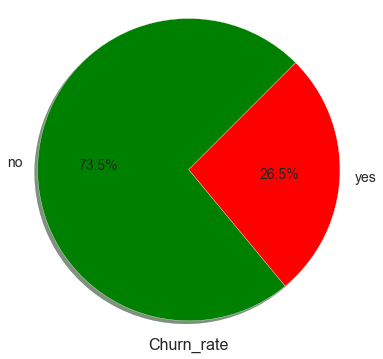

In [23]:
plt.figure(figsize=(6,6))

conversion_rate = a.index
count = a.values
colors= ['green','red']

plt.pie(count, labels=['no','yes'],
        shadow=True,
        colors=colors, 
        autopct='%1.1f%%',
        startangle=45,
        textprops={'fontsize': 14})

plt.xlabel('Churn_rate',fontsize=16)
plt.axis('equal')
plt.show()

In [24]:
#stratify --> inbalance data

X = df_new.drop('Churn',axis=1).copy()
y = df_new['Churn'].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)


In [25]:
#insert 'churn' pada X_train dan X_test untuk memudahkan analisis
X_train['Churn'] = y_train
X_test['Churn'] = y_test

In [26]:
#menghitung persentase data churn pada X_train

round(((X_train['Churn'].value_counts(normalize=True))*100),1)

0    73.5
1    26.5
Name: Churn, dtype: float64

In [27]:
#menghitung persentase data churn pada X_train

round(((X_test['Churn'].value_counts(normalize=True))*100),1)

0    73.5
1    26.5
Name: Churn, dtype: float64

##### Baik data Train dan data Test memiliki jumlah perbandingan target yang sama yaitu 73.5 : 25.5

In [28]:
info_data(X_train)

Number of Rows,Columns (4907, 20)
Number of Duplicated Values 0


,Missing_value,Percent_missing_%,Data_type,Number of Unique
gender,0,0.0,object,2
SeniorCitizen,0,0.0,int64,2
TotalCharges,0,0.0,float64,4645
MonthlyCharges,0,0.0,float64,1432
PaymentMethod,0,0.0,object,4
PaperlessBilling,0,0.0,object,2
Contract,0,0.0,object,3
StreamingMovies,0,0.0,object,3
StreamingTV,0,0.0,object,3
TechSupport,0,0.0,object,3


#### Summary - 4 (X_train)

1. Total column = 20
2. Total row = 4907 (70% df_new)

## 6. Descriptive Statistic

In [29]:
numerical = ['SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges','Churn']
categorical = ['gender','Partner', 'Dependents','PhoneService', 'MultipleLines', 
               'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling',
               'PaymentMethod']

In [30]:
#analisa numerical

X_train[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,4907.0,0.161198,0.367751,0.00,0.000,0.00,0.000,1.00
tenure,4907.0,32.316894,24.406190,1.00,9.000,29.00,55.000,72.00
MonthlyCharges,4907.0,65.093183,29.972623,18.55,38.575,70.45,90.050,118.65
TotalCharges,4907.0,2284.622774,2264.198540,18.80,414.525,1399.35,3778.425,8684.80
Churn,4907.0,0.264928,0.441340,0.00,0.000,0.00,1.000,1.00


#### Observation

1. `Churn` dan `SeniorCitizen` adalah faeature dengan tipe data boolean. Jadi, kita tidak perlu mengetahui kesimetrisan dari 2 feature ini. Menurut informasi pada poin 5.Spliting Data, kita dapat mengetahui bahwa `Churn` memiliki data yang inbalance yaitu 26% memilih untuk churn dan sisanya tidak. Untuk feature `SeniorCitizen` akan dianalisa setelah bagian ini <br/>
<br/>
2. `tenure` dan `monthlyCharges` memiliki distribusi yang cenderung simetris karna perbedaan nilai mean dan median kurang dari 15% <br/>
<br/>
3. `TotalCharges` memiliki distribusi yang tidak simetris karna memiliki perbedaan besar antara nilai mean dan median 

In [31]:
X_train[categorical].describe().T

,count,unique,top,freq
gender,4907,2,Female,2456
Partner,4907,2,No,2540
Dependents,4907,2,No,3439
PhoneService,4907,2,Yes,4424
MultipleLines,4907,3,No,2325
InternetService,4907,3,Fiber optic,2159
OnlineSecurity,4907,3,No,2454
OnlineBackup,4907,3,No,2162
DeviceProtection,4907,3,No,2163
TechSupport,4907,3,No,2441


#### Observation

1. Rata-rata feature cetagorical memiliki nilai unique value 3 
2. Jumlah customer `gender` relatif seimbang antara wanita dan pria
3. Tidak banyak perbedaan jumlah customer yang memiliki `Partner` dan tidak
4. Sebagian besar customer tidak memiliki `Dependents`
5. Customer cenderung menggunakan `InternetService` fiber optic dan menggunakan layanan `PhoneService`
6. Sebagian besar customer menggunakan layanan tanpa `MultipleLines`,`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport` 
7. Sebagian besar customer menggunakan service `StreamingTV`, `StreamingMovies`
8. Customer lebih menyukai `Contract`/bulan dan menerima tagihan secara `PaperlessBilling` serta menggunakan `PaymentMethod` electronic check 


##### untuk mempermudah analisis, maka kita akan mengubah data pada beberapa feature predictor

1. Asumsi data 'No internet service' sama dengan 'No' pada feature : <br/>
   `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` <br/>
2. Asumsi data 'No phone service' sama dengan 'No' pada feature `Multiplelines`
3. Mengganti data 'yes', 'no' menjadi boolean pada beberapa feature predictor

In [32]:
#replace data beberapa predictor

X_train['Partner'] = X_train['Partner'].replace(['Yes','No'],[1,0])

X_train['Dependents'] = X_train['Dependents'].replace(['Yes','No'],[1,0])

X_train['PhoneService'] = X_train['PhoneService'].replace(['Yes','No'],[1,0])

X_train['PaperlessBilling'] = X_train['PaperlessBilling'].replace(['Yes','No'],[1,0])

X_train['OnlineSecurity'] = X_train['OnlineSecurity'].replace(['Yes','No','No internet service'],[1,0,0]) 

X_train['OnlineBackup'] = X_train['OnlineBackup'].replace(['Yes','No','No internet service'],[1,0,0]) 
 
X_train['DeviceProtection'] = X_train['DeviceProtection'].replace(['Yes','No','No internet service'],[1,0,0]) 

X_train['TechSupport'] = X_train['TechSupport'].replace(['Yes','No','No internet service'],[1,0,0]) 

X_train['StreamingTV'] = X_train['StreamingTV'].replace(['Yes','No','No internet service'],[1,0,0]) 

X_train['StreamingMovies'] = X_train['StreamingMovies'].replace(['Yes','No','No internet service'],[1,0,0]) 

X_train['MultipleLines'] = X_train['MultipleLines'].replace(['Yes','No','No phone service'],[1,0,0]) 



## 7. Analisa Univariate

In [33]:
numerical_new = ['tenure','MonthlyCharges', 'TotalCharges']

#### Check Outlier of Numerical Continue Data

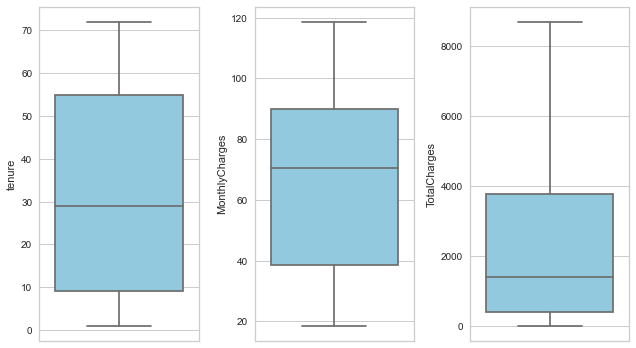

In [34]:
plt.figure(figsize=(9,5))

for x in range(0, len(numerical_new)):
    plt.subplot(1, len(numerical_new), x+1)
    sns.boxplot(y=X_train[numerical_new[x]], color='skyblue')
    plt.tight_layout()

       

In [35]:
X_train['outlier_tenure'] = outlier(X_train,'tenure')
X_train[X_train['outlier_tenure']=='outlier']

 outlier lower limit : -60.0 
 outlier upper limit : 124.0


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,outlier_tenure


In [36]:
X_train['outlier_MonthlyCharges'] = outlier(X_train,'MonthlyCharges')
X_train[X_train['outlier_MonthlyCharges']=='outlier']

 outlier lower limit : -38.63749999999999 
 outlier upper limit : 167.2625


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,outlier_tenure,outlier_MonthlyCharges


In [37]:
X_train['outlier_TotalCharges'] = outlier(X_train,'TotalCharges')
X_train[X_train['outlier_TotalCharges']=='outlier']

 outlier lower limit : -4631.325000000001 
 outlier upper limit : 8824.275000000001


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,outlier_tenure,outlier_MonthlyCharges,outlier_TotalCharges


In [38]:
X_train = X_train.drop(['outlier_tenure','outlier_MonthlyCharges','outlier_TotalCharges'],axis=1)

#### Observation 
1. Berdasarkan boxplot dan hasilformula IQR, dapat diketahui bahwa `TotalCharges`, `MonthlyCharges` dan `Tenure` tidak memiliki outlier

#### Check Distribution of Numerical Continue Data

In [39]:
for x in numerical_new :
    skew1 = round((X_train[x].skew()),1)
    print(f' Nilai skew feature {x} :',skew1)
    

 Nilai skew feature tenure : 0.2
 Nilai skew feature MonthlyCharges : -0.2
 Nilai skew feature TotalCharges : 1.0


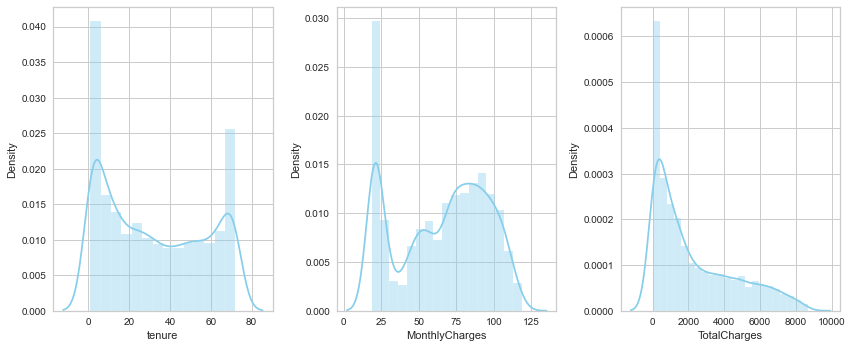

In [40]:
plt.figure(figsize=(12,5))

for i in range(0, len(numerical_new)):
    plt.subplot(1, len(numerical_new), i+1)
    sns.distplot(x=X_train[numerical_new[i]], color='skyblue')
    plt.xlabel(numerical_new[i])
    plt.tight_layout()

#### Observation

1. Berdasarkan data diatas, dapat disimpulkan bahwa feature `TotalCharges`, `MonthlyCharges` dan `Tenure` tidak memiliki distribusi normal sehingga perlu dilakukan transformasi
2. `TotalCharges` memiliki distribusi unimodal dengan nilai skew 1, sedangkan  `MonthlyCharges` dan `Tenure` memiliki distribusi  bimodal dengan nilai skew -0.2 dan 0.2

## 8. Analisa Multivariate

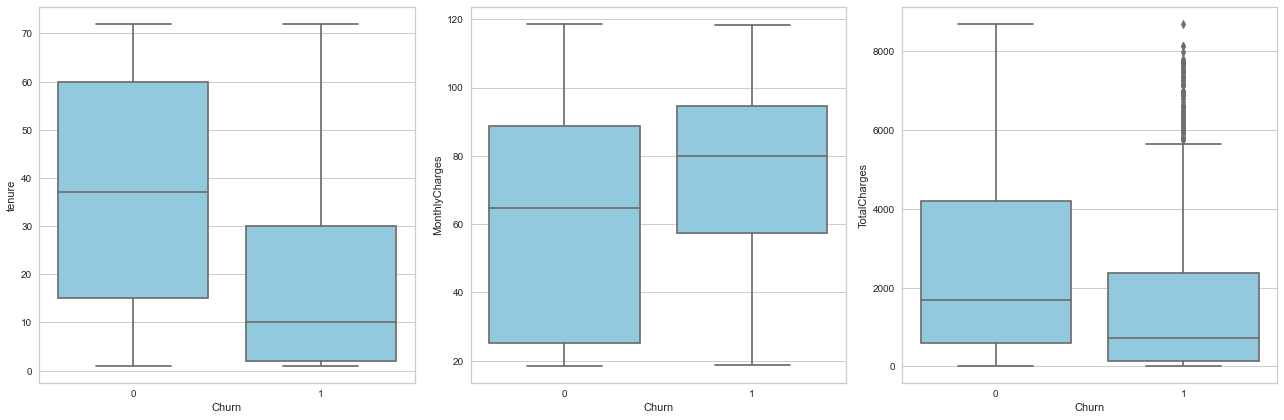

In [41]:
plt.figure(figsize=(18,6))

for x in range(0, len(numerical_new)):
    plt.subplot(1, len(numerical_new), x+1)
    sns.boxplot(x=X_train['Churn'],y=X_train[numerical_new[x]], color='skyblue')
    plt.tight_layout()

In [42]:
X_train[(X_train['TotalCharges']>=5800)&(X_train['Churn']==1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4076,Female,1,1,0,68,1,1,Fiber optic,0,1,0,0,1,1,Month-to-month,1,Electronic check,100.20,6851.65,1
1335,Male,0,1,0,66,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Credit card (automatic),105.00,7133.25,1
1302,Female,0,0,0,70,1,1,Fiber optic,1,1,1,1,1,1,One year,0,Credit card (automatic),115.55,8127.60,1
2992,Male,1,1,0,69,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Electronic check,89.95,6143.15,1
4258,Male,1,1,0,66,1,1,Fiber optic,0,0,0,1,1,1,Month-to-month,1,Credit card (automatic),100.05,6871.90,1
6280,Male,0,0,0,67,1,1,Fiber optic,1,1,1,1,1,1,Two year,0,Credit card (automatic),116.20,7752.30,1
3688,Female,0,1,1,67,1,1,Fiber optic,1,0,1,1,1,1,Two year,1,Credit card (automatic),108.75,7156.20,1
5535,Male,0,1,0,59,1,1,Fiber optic,1,1,1,1,1,0,Month-to-month,1,Electronic check,106.75,6252.90,1
6842,Female,0,0,0,54,1,1,Fiber optic,0,1,1,1,1,1,Month-to-month,0,Electronic check,111.10,6014.85,1
5756,Female,1,1,0,68,1,1,Fiber optic,1,1,0,0,0,1,One year,1,Credit card (automatic),96.55,6581.90,1


#### Observation

1. Pada analisa univariate, kita tahu bahwa `TotalCharges` tidak memiliki outlier, tetapi jika kita hubungkan dengan target, `TotalCharges` memiliki outlier pada data `Churn` sama dengan 1

2. Customer yang membayar `TotalCharges` mahal karna sebagian besar menggunakan fasilitas service yang canggih dan lengkap seperti fiber optic, `OnlineSecurity`, `DeviceProtection` dll dan memiliki masa `tenure` yang cukup lama. Hal ini menjadi make sense mengapa `TotalCharges` memiliki nilai yang tinggi daripada yang lain. Sehingga oultlier tetap dipertahankan


### 8.1 Analisa Customer Demographic 

In [43]:
#catergoric vs target

def predictor_target (p,t='Churn') :
    
    ax = ((X_train.groupby([p])[t].mean())/((X_train.groupby([p])[t].mean()).sum())*100).sort_values(ascending=False).plot(kind='bar',figsize=(10,8))
    abs_values = round(((X_train.groupby([p])[t].mean())/((X_train.groupby([p])[t].mean()).sum())*100),1).sort_values(ascending=False)
    ax.bar_label(container=ax.containers[0], labels=abs_values)  
    
    plt.xticks(rotation=0);
    plt.ylabel('Churn Rate (%)',fontsize=12)
    plt.title(f'{p} vs Churn Rate (%)',fontsize=12)
    plt.xlabel(p,fontsize=12)
    plt.ylim(0,100)
    
    plt.show()

In [44]:
demographic = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

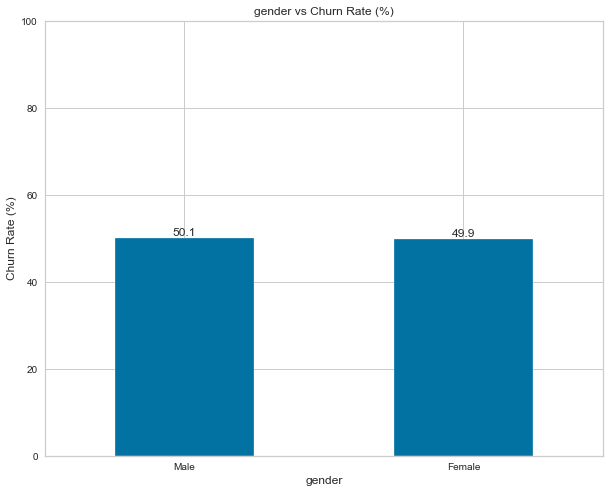

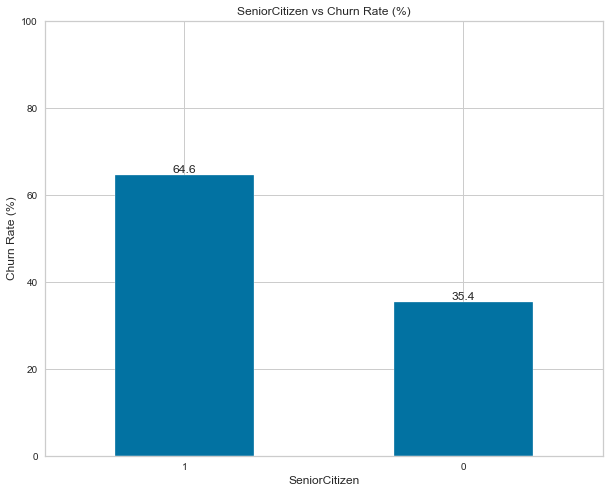

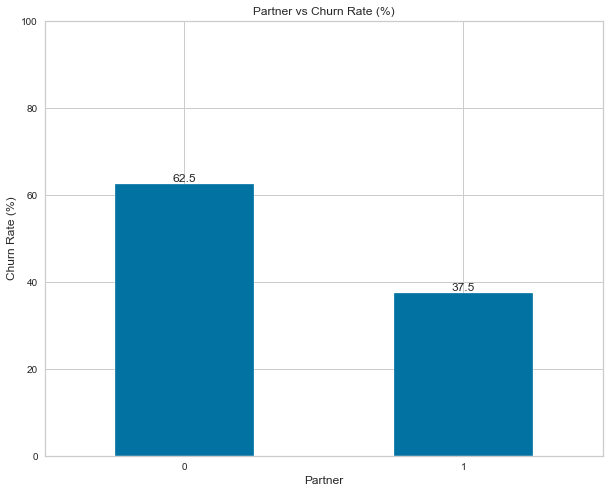

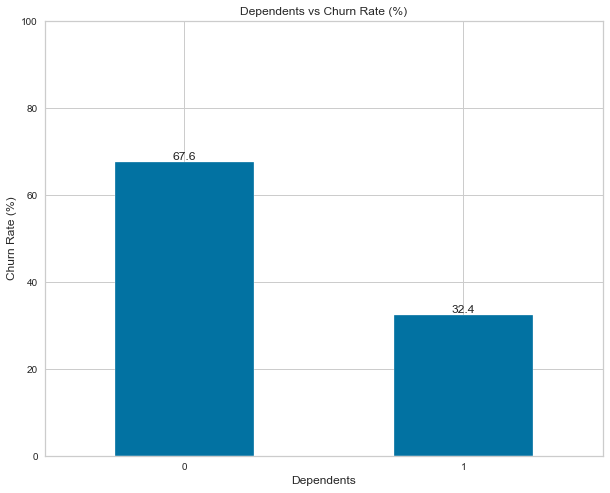

In [45]:
for x in demographic :
    predictor_target(x)

In [46]:
for x in demographic :
    chi_cek(x,'Churn')

===== gender =====
Number Expected :
[[1805.33768086  650.66231914]
 [1801.66231914  649.33768086]]

Chi-square Statistic : 0.00011028754004072105 ,p-value: 0.991620939935715 lebih dari 0.05 
Target dan Predictor adalah variabel independent

===== SeniorCitizen =====
Number Expected :
[[3025.55777461 1090.44222539]
 [ 581.44222539  209.55777461]]

Chi-square Statistic : 126.68775220791495 ,p-value: 2.174272507176835e-29 kurang dari 0.05 
Target dan Predictor adalah variabel dependent

===== Partner =====
Number Expected :
[[1867.0837579  672.9162421]
 [1739.9162421  627.0837579]]

Chi-square Statistic : 108.07616817256829 ,p-value: 2.5864489986420304e-25 kurang dari 0.05 
Target dan Predictor adalah variabel dependent

===== Dependents =====
Number Expected :
[[2527.91379662  911.08620338]
 [1079.08620338  388.91379662]]

Chi-square Statistic : 139.88879810872012 ,p-value: 2.8153415730022417e-32 kurang dari 0.05 
Target dan Predictor adalah variabel dependent



#### Observation :

Dari tabel dan uji statistik diatas, dapat disimpulkan bahwa : <br/>

1. Feature `gender` tidak mempengaruhi churn rate
2. Customer yang lebih tua/senior relatif memilih churn daripada yang lebih muda
3. Customer yang tidak memiliki tanggungan dan single cenderung ingin churn

### 8.2 Analisa Telco Services

In [47]:
### Feature Extraction

X_train['Total_service'] = X_train['PhoneService'] + X_train['MultipleLines'] + X_train['OnlineSecurity'] + X_train['OnlineBackup'] + X_train['DeviceProtection'] + X_train ['TechSupport'] + X_train['StreamingTV'] + X_train['StreamingMovies']

In [48]:
X_train['Total_service'].unique()

array([8, 4, 6, 2, 1, 3, 5, 0, 7], dtype=int64)

In [49]:
#replace 0 dgn modus 
X_train['Total_service'] = X_train['Total_service'].replace(0,1)
X_train['Total_service'].unique()

array([8, 4, 6, 2, 1, 3, 5, 7], dtype=int64)

In [50]:
info_data(X_train)

Number of Rows,Columns (4907, 21)
Number of Duplicated Values 0


,Missing_value,Percent_missing_%,Data_type,Number of Unique
gender,0,0.0,object,2
TechSupport,0,0.0,int64,2
Churn,0,0.0,int64,2
TotalCharges,0,0.0,float64,4645
MonthlyCharges,0,0.0,float64,1432
PaymentMethod,0,0.0,object,4
PaperlessBilling,0,0.0,int64,2
Contract,0,0.0,object,3
StreamingMovies,0,0.0,int64,2
StreamingTV,0,0.0,int64,2


#### Summary - 5 (X_train) 

1. Terdapat feature baru yaitu feature `Total_service`

In [51]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies','Total_service']

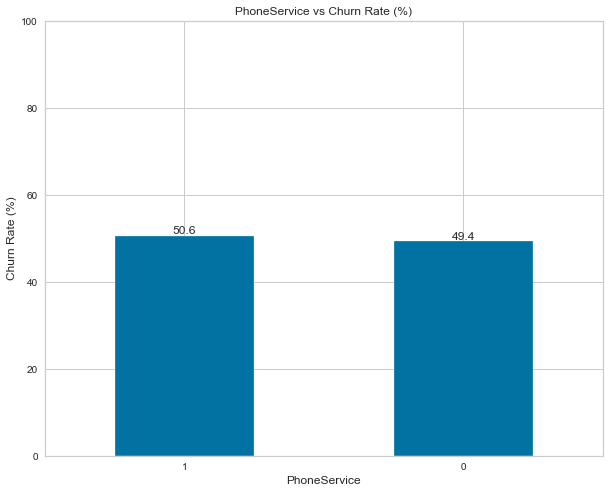

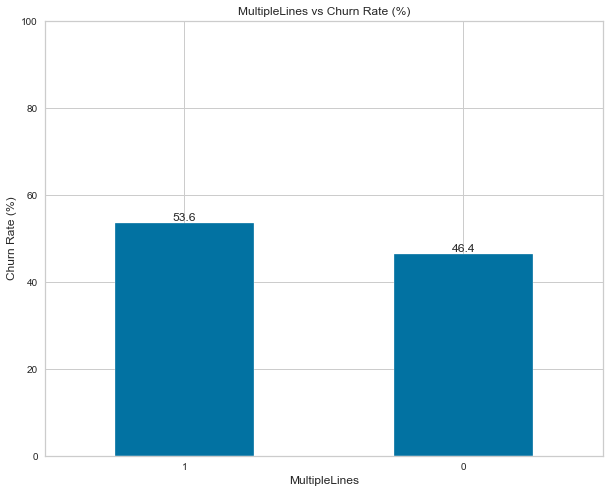

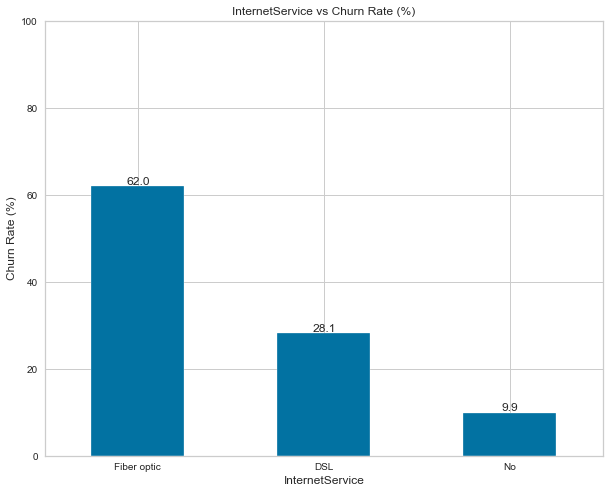

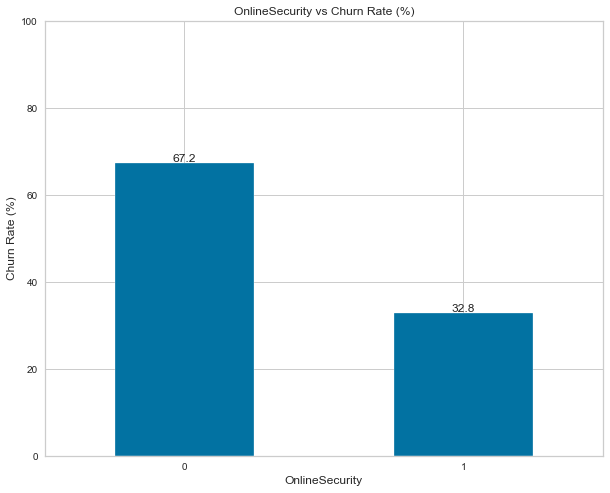

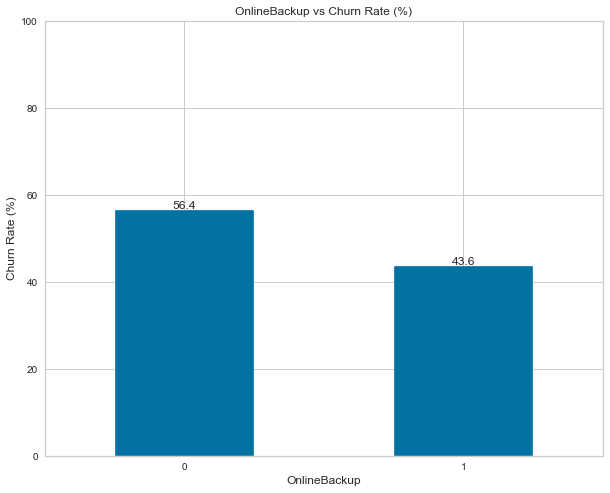

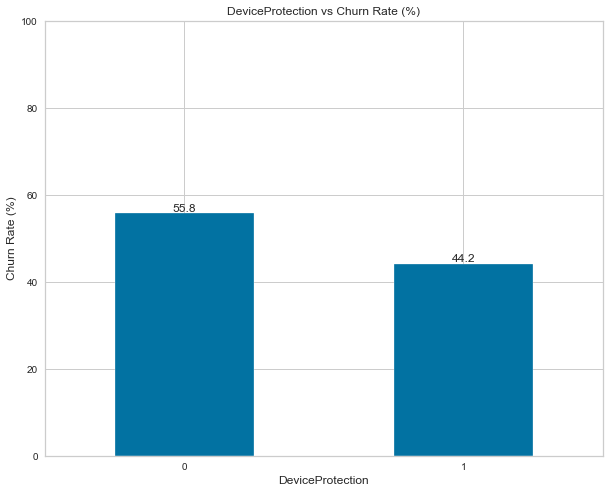

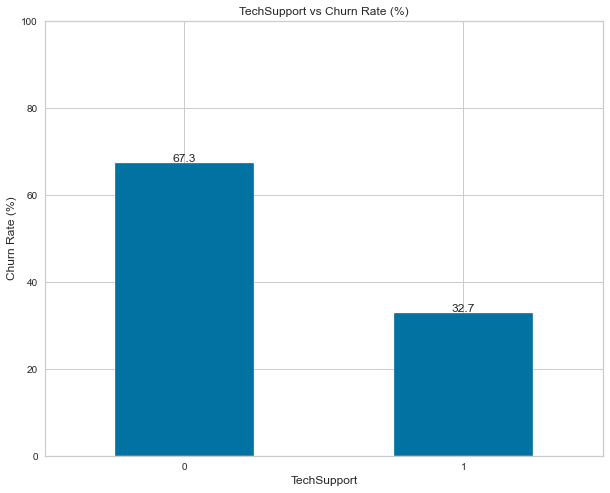

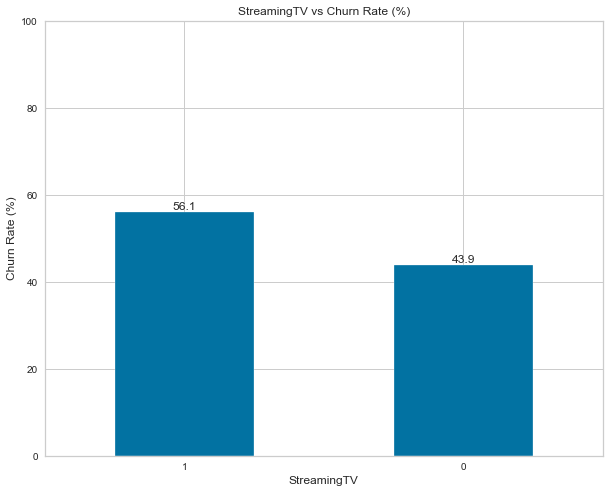

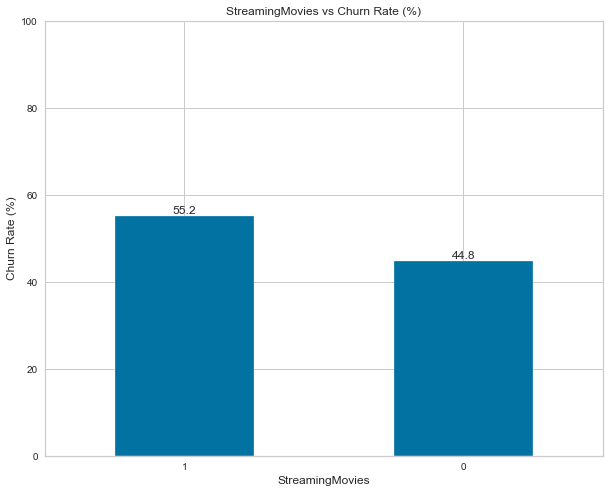

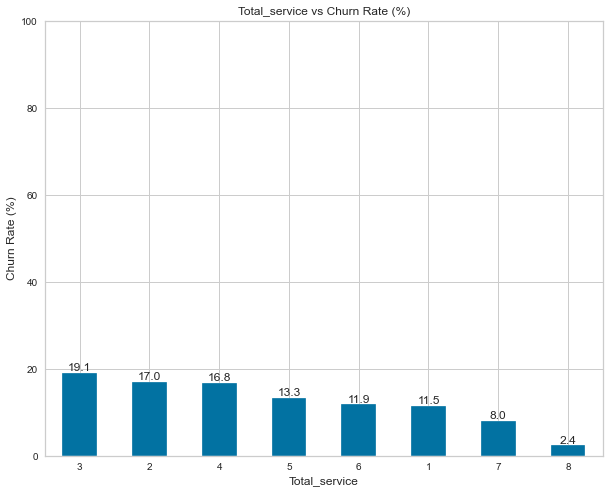

In [52]:
for x in services : 
     predictor_target(x)

In [53]:
for x in services : 
     chi_cek(x,'Churn')

===== PhoneService =====
Number Expected :
[[ 355.03994294  127.96005706]
 [3251.96005706 1172.03994294]]

Chi-square Statistic : 0.07136525003819313 ,p-value: 0.7893592518263568 lebih dari 0.05 
Target dan Predictor adalah variabel independent

===== MultipleLines =====
Number Expected :
[[2064.08314653  743.91685347]
 [1542.91685347  556.08314653]]

Chi-square Statistic : 8.818266555887806 ,p-value: 0.0029822984168058906 kurang dari 0.05 
Target dan Predictor adalah variabel dependent

===== InternetService =====
Number Expected :
[[1259.91400041  454.08599959]
 [1587.02119421  571.97880579]
 [ 760.06480538  273.93519462]]

Chi-square Statistic : 521.4979744412632 ,p-value: 5.729987680301122e-114 kurang dari 0.05 
Target dan Predictor adalah variabel dependent

===== OnlineSecurity =====
Number Expected :
[[2563.93234155  924.06765845]
 [1043.06765845  375.93234155]]

Chi-square Statistic : 131.0338953943184 ,p-value: 2.4341424357339473e-30 kurang dari 0.05 
Target dan Predictor adal

#### Observation :

Berdasarkan barchat dan hasil uji statistik chi_square, dapat disimpulkan : <br/>
<br/>

1. Feature `PhoneService` tidak mempengaruhi churn rate. Perbedaan churn rate antara yang menggunakan `PhoneService` dan tidak hanya 1.2%
2. Customer yang menggunakan services `MultipleLines`, `StreamingTV`, `StreamingMovies` cenderung memilih untuk churn
3. Customer yang menggunakan `InternetService` fiber optic relatif ingin churn
4. Customer yang yang menggunakan service tanpa proteksi seperti  `OnlineSecurity` dan `DeviceProtection` memiliki kecenderungan untuk churn
5. Customer yang yang menggunakan service tanpa support seperti `OnlineBackup` dan `TechSupport` memimiliki kecenderungan untuk churn
6. Semakin banyak jumlah `Total_service` yang digunakan, semakin loyal customer (churn rate kecil)

### 8.3 Analisa Customer Account

In [54]:
account_cat =  ['Contract', 'PaperlessBilling', 'PaymentMethod']
account_num =  ['MonthlyCharges', 'TotalCharges','tenure']
       

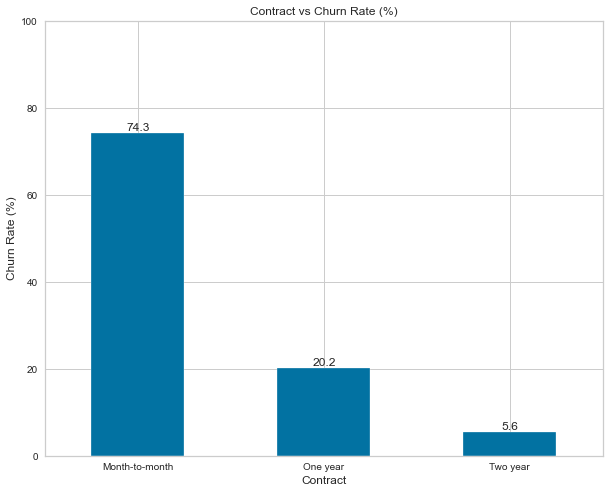

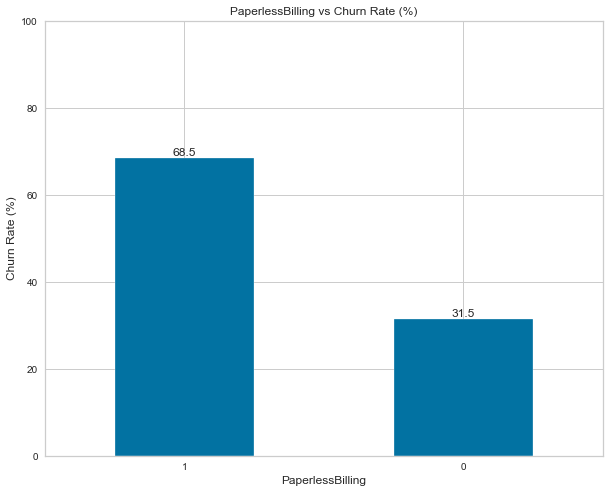

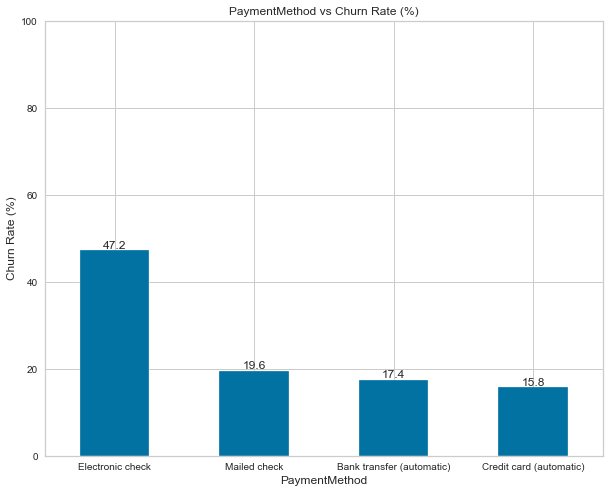

In [55]:
for x in account_cat :
     predictor_target(x)
    

In [56]:
for x in account_cat :
     chi_cek(x,'Churn')

===== Contract =====
Number Expected :
[[1986.90055023  716.09944977]
 [ 760.79987773  274.20012227]
 [ 859.29957204  309.70042796]]

Chi-square Statistic : 794.0101351059453 ,p-value: 3.82727681138555e-173 kurang dari 0.05 
Target dan Predictor adalah variabel dependent

===== PaperlessBilling =====
Number Expected :
[[1458.38353373  525.61646627]
 [2148.61646627  774.38353373]]

Chi-square Statistic : 202.93825031242957 ,p-value: 4.771585146033812e-46 kurang dari 0.05 
Target dan Predictor adalah variabel dependent

===== PaymentMethod =====
Number Expected :
[[ 775.50132464  279.49867536]
 [ 804.90421846  290.09578154]
 [1209.9290809   436.0709191 ]
 [ 816.66537599  294.33462401]]

Chi-square Statistic : 460.5567979712458 ,p-value: 1.6822231448709375e-99 kurang dari 0.05 
Target dan Predictor adalah variabel dependent



### Observation

1. Customer dengan `Contract` bulanan, dengan tagihan berupa `PaperlessBilling` dan menggunakan `PaymentMethod` electronic check memiliki kecenderungan untuk churn

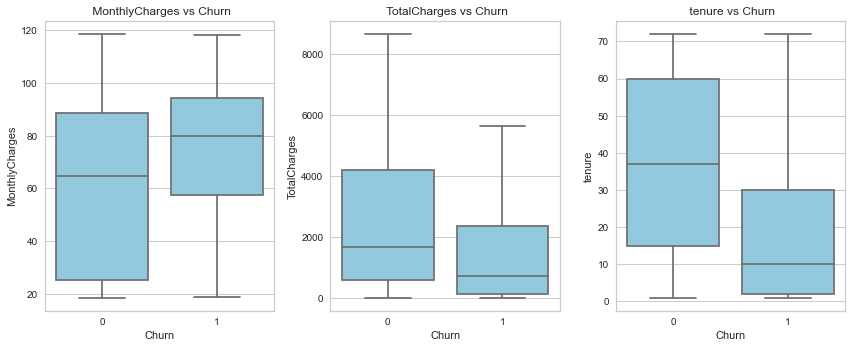

In [57]:
plt.figure(figsize=(12,5))

for x in range(0, len(account_num)):
    plt.subplot(1, len(account_num), x+1)
    sns.boxplot(x=X_train['Churn'],y=X_train[account_num[x]], color='skyblue',showfliers=False)
    plt.title(f' {account_num[x]} vs Churn')
    plt.tight_layout()


In [58]:
def two_variable (i,j) :
      
        plt.figure(figsize=(10,6))
        ax= (X_train.groupby([j])[i].mean()).plot(kind='bar')
        abs_values = round((X_train.groupby([j])[i].mean()),1)
        ax.bar_label(container=ax.containers[0], labels=abs_values)

        plt.title(f'{i} vs {j}',fontsize=12)
        plt.ylabel(i,fontsize=12)
        plt.xlabel(j,fontsize=12)
        plt.xticks(rotation=0);
        plt.ylim(0,max(abs_values)+(0.1*max(abs_values)))
        plt.show()

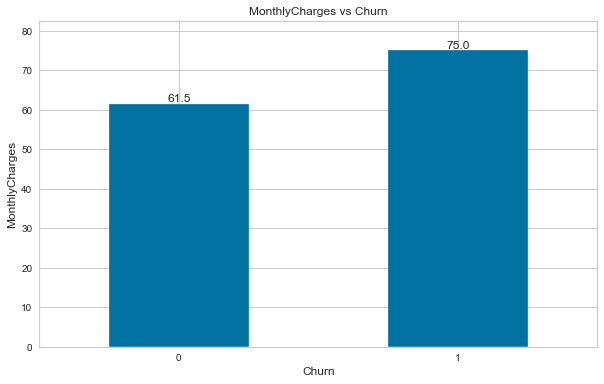

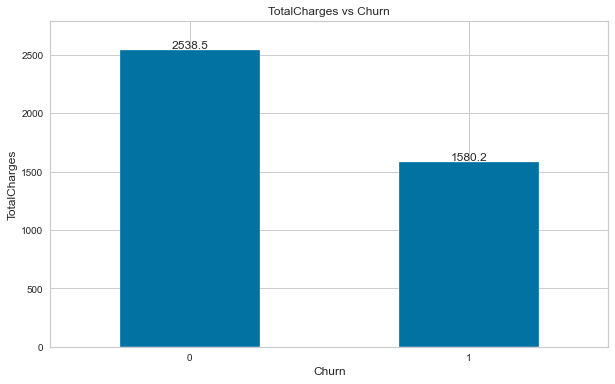

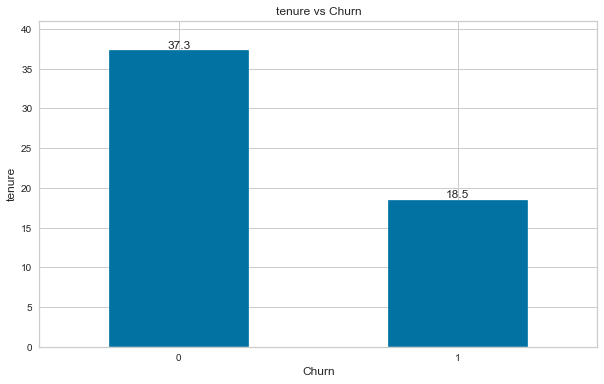

In [59]:
for x in account_num :
    two_variable (x,'Churn')

Text(0, 0.5, 'Churn Rate(%)')

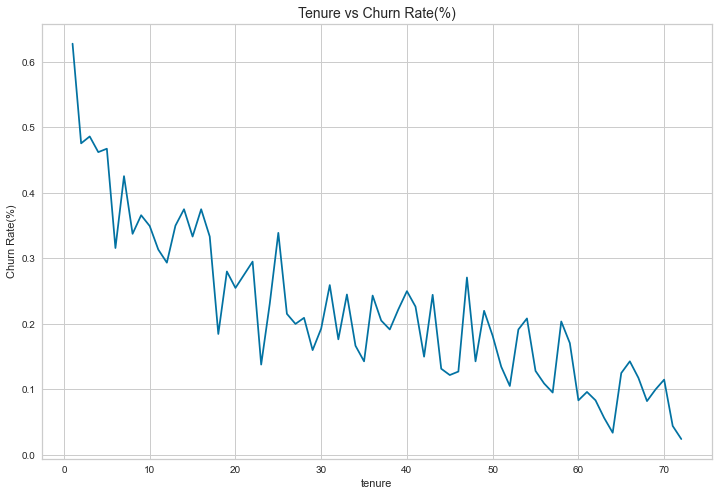

In [60]:
(X_train.groupby(['tenure'])['Churn'].mean()).plot(kind='line',figsize=(12,8))
plt.title('Tenure vs Churn Rate(%)',fontsize=14)
plt.ylabel('Churn Rate(%)')


Text(0, 0.5, 'TotalCharges')

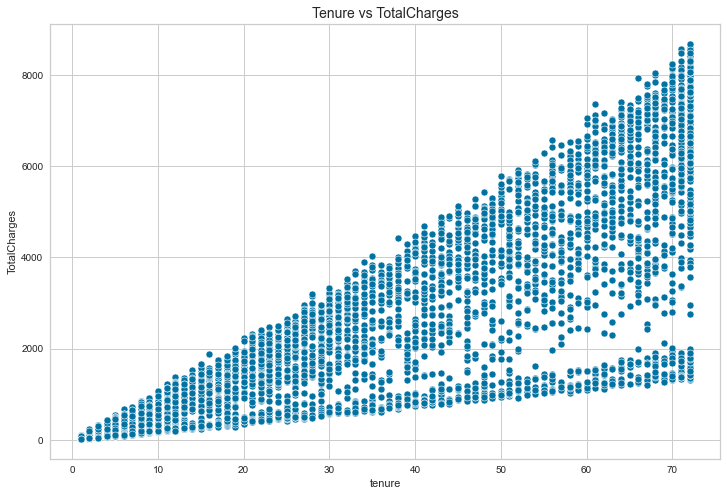

In [61]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=X_train,x='tenure',y='TotalCharges')
plt.title('Tenure vs TotalCharges',fontsize=14)
plt.ylabel('TotalCharges')


In [62]:
for x in account_num :
    annova_cek(x)

MonthlyCharges
Kesimpulan : nilai p_value 1.7135846625876393e-44 kurang dari alpha 0.05, nilai ftest = 199.79320486470766
Terdapat perbedaan target yang signifikan dari segi predictor

TotalCharges
Kesimpulan : nilai p_value 9.082154621013154e-40 kurang dari alpha 0.05, nilai ftest = 177.31882793482205
Terdapat perbedaan target yang signifikan dari segi predictor

tenure
Kesimpulan : nilai p_value 2.722854142248498e-133 kurang dari alpha 0.05, nilai ftest = 642.4091734028068
Terdapat perbedaan target yang signifikan dari segi predictor



### Observation

Berdasarkana barchart dan uji statistik dapat diketahui bahwa :

1. Customer yang churn memiliki `MonthlyCharges` lebih tinggi daripada yang tidak churn
2. Semakin lama masa `tenure` semakin besar jumlah `TotalCharges` 
3. Semakin lama masa `tenure` semakin kecil kecenderungan customer untuk churn


## 9. Deep-dive Question Analysis

1. Apakah harga service adalah penyebab customer churn?
2. Apakah harga `InternetService` fiber optic adalah penyebab customer churn?
3. Apa penyebab customer dengan `Contract` month to month memiliki churn rate tinggi?
4. Bagaimana hubungan `tenure` dengan `Contract`?
5. Jenis service apa yang dipilih customer berdasarkan lamanya masa tenur?

### 9.1 Apakah harga service adalah penyebab customer churn?

Berdasarkan hasil observation pada 8.2 Analisa Telco Services, kita tahu bahwa customer yang cenderung churn adalah customer yang menggunakan service seperti `StreamingTV` dan `InternetService` fiber optic dan tidak menggunakan proteksi service seperti `OnlineSecurity`. Dari hal itu muncul asumsi bahwa harga service yang mahal adalah salah satu penyebab utama customer churn. Tetapi ketika kita anlisa jumlah `Total_service` yang digunakan customer, kita tahu bahwa semakin banyak service yang digunakan semakin kecil kecenderungan customer untuk churn. Pada bagian ini, kita akan menganalisa, apakah benar harga adalah salah satu penyabab customer churn?

In [63]:
from functools import reduce

In [64]:
def services_charges (s,c='MonthlyCharges') : 
    col_name = str(f' {s}-Charges')
    df_s = X_train.groupby(s).agg(monthlycharges = ('MonthlyCharges','mean')).reset_index()
    df_s = df_s.rename(columns = {'monthlycharges' : col_name})
    df_s = df_s.rename(columns={s : 'Services'})
    df_s = df_s.rename(columns= {col_name : s})
    return df_s

In [65]:
df_1 = services_charges ('InternetService')
df_1

,Services,InternetService
0,DSL,58.206534
1,Fiber optic,91.627883
2,No,21.104110


In [66]:
#karna nilai no kecil dibandingkan yang lain, maka drop
#replace string data to numeric

df_1 = df_1[df_1['Services']!='No']
df_1 = df_1.replace(['DSL','Fiber optic'],[0,1])
df_1

,Services,InternetService
0,0,58.206534
1,1,91.627883


In [67]:
df_2 = services_charges ('MultipleLines')
df_2

,Services,MultipleLines
0,0,52.274769
1,1,82.241401


In [68]:
df_3 = services_charges ('OnlineSecurity')
df_3

,Services,OnlineSecurity
0,0,59.382540
1,1,79.130338


In [69]:
df_4 = services_charges ('OnlineBackup')
df_4

,Services,OnlineBackup
0,0,55.530804
1,1,82.954880


In [70]:
df_5 = services_charges ('DeviceProtection')
df_5

,Services,DeviceProtection
0,0,54.397060
1,1,85.090556


In [71]:
df_6 = services_charges ('TechSupport')
df_6

,Services,TechSupport
0,0,58.745482
1,1,80.496997


In [72]:
df_7 = services_charges ('StreamingTV')
df_7

,Services,StreamingTV
0,0,50.089136
1,1,88.616013


In [73]:
df_8 = services_charges ('StreamingMovies')
df_8

,Services,StreamingMovies
0,0,50.033485
1,1,88.302745


In [74]:
df_total_service = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8]

df_final_service = reduce(lambda  left,right: pd.merge(left,right,on=['Services'],
                                            how='outer'), df_total_service)
df_final_service

,Services,InternetService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,58.206534,52.274769,59.382540,55.530804,54.397060,58.745482,50.089136,50.033485
1,1,91.627883,82.241401,79.130338,82.954880,85.090556,80.496997,88.616013,88.302745


In [75]:
df_final_service = df_final_service.drop('Services',axis=1)


Text(0, 0.5, 'Ave Monthly Charges')

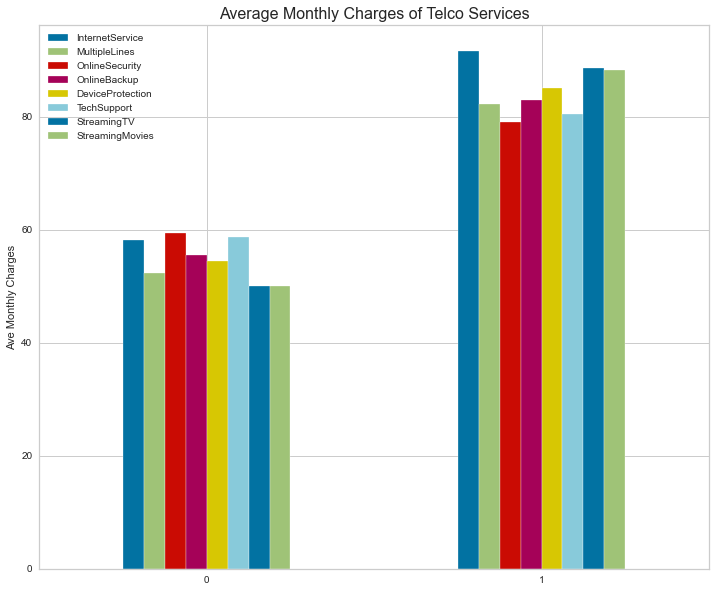

In [76]:
df_final_service.plot(kind='bar',figsize=(12,10))
plt.title('Average Monthly Charges of Telco Services',fontsize=16)
plt.xticks(rotation=0);
plt.ylabel('Ave Monthly Charges')


#### Observation 

Berikut ada urutan 5 service paling mahal berdasarkan barchart diatas :
    
1. Internet Service - FIber Optic
2. Streaming TV
3. Streaming Movie
4. Device Protection
5. Online Backup <br/>

lalu kita akan menganalisa distribusi harga tiap service dengan jumlah service yang digunakan

In [77]:
def boxplot (hue,df=X_train,x='Total_service',y='MonthlyCharges') :
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df,x=x,y=y,hue=hue,showfliers=False)
    plt.ylabel(y)
    plt.title(f'Distribusi Harga {hue} pada Total Service',fontsize=16)
    

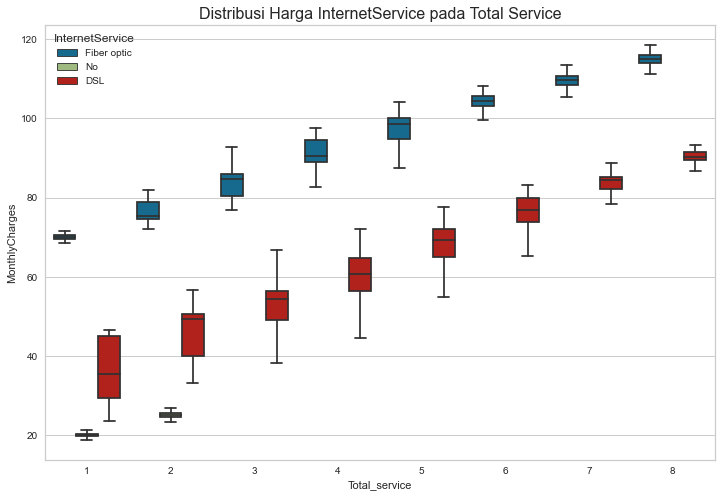

In [78]:
boxplot('InternetService')

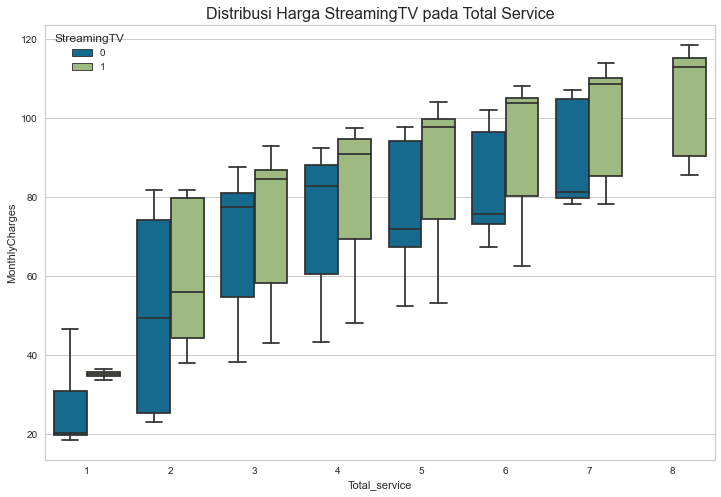

In [79]:
boxplot('StreamingTV')

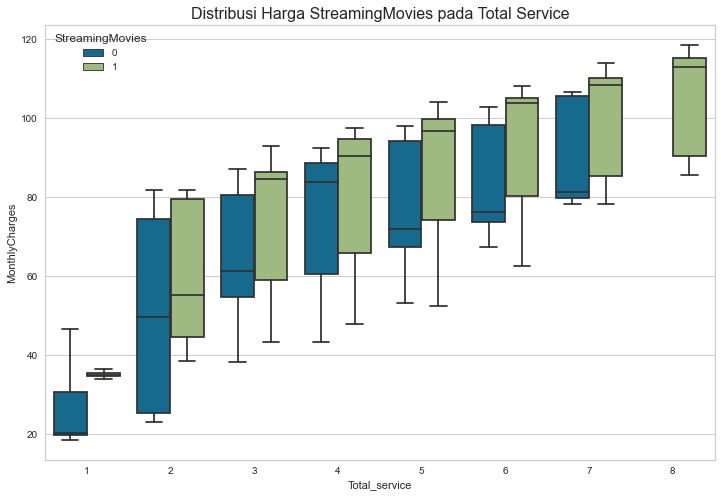

In [80]:
boxplot('StreamingMovies')

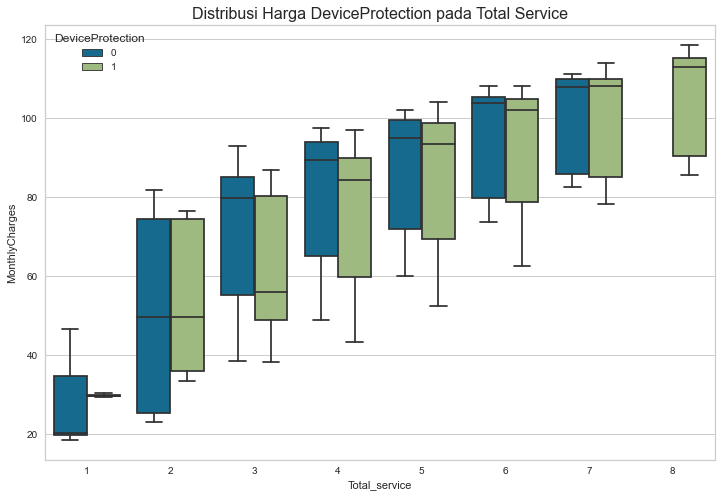

In [81]:
boxplot('DeviceProtection')

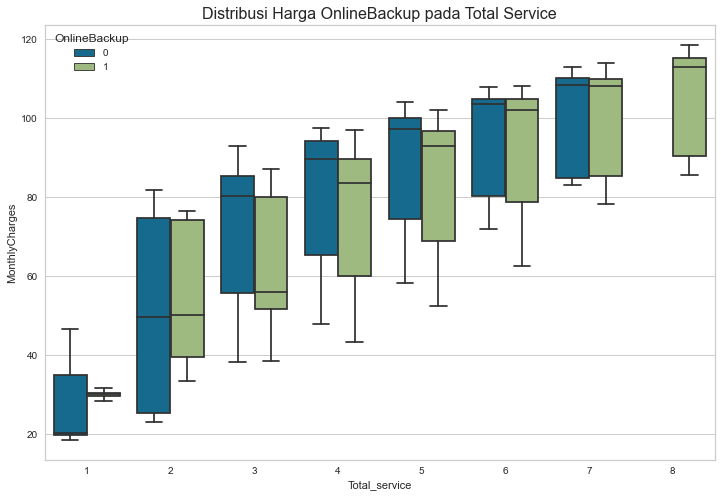

In [82]:
boxplot('OnlineBackup')

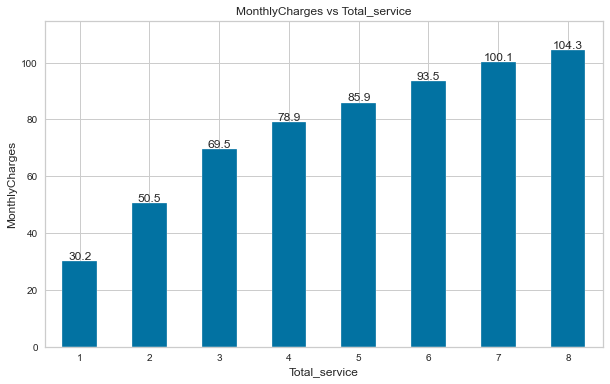

In [83]:
two_variable ('MonthlyCharges','Total_service')

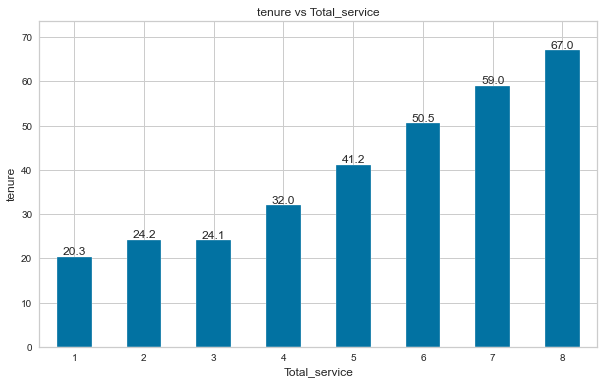

In [84]:
two_variable ('tenure','Total_service')

#### Observation

1. `StreamingTV`, `StreamingMovies`, `DeviceProtection`, `OnlineBackup` memiliki distribusi harga yang relatif sama antara yang menggunakan service tersebut dan tidak pada jumlah service yang sama. 
2. `InternetService` fiber optic memiliki distribusi harga yang berbeda signifikan dengan DSL dan tidak pada jumlah service yang sama
3. Semakin loyal customer, semakin banyak jumlah service yang digunakan. Customer tidak keberatan untuk membayar biaya semakin mahal <br/>

##### dari 3 pernyataan diatas, dapat disimpulkan bahwa harga service selain `InternetService` bukan penyebab customer churn. `InternetService` perlu dianalisa lebih lanjut  karna memiliki distribusi harga yang berbeda signifikan

### 9.2 Apakah harga `InternetService` adalah penyebab customer churn?

Text(0.5, 1.0, 'Pengaruh Internet Service pada Churn Rate (%)')

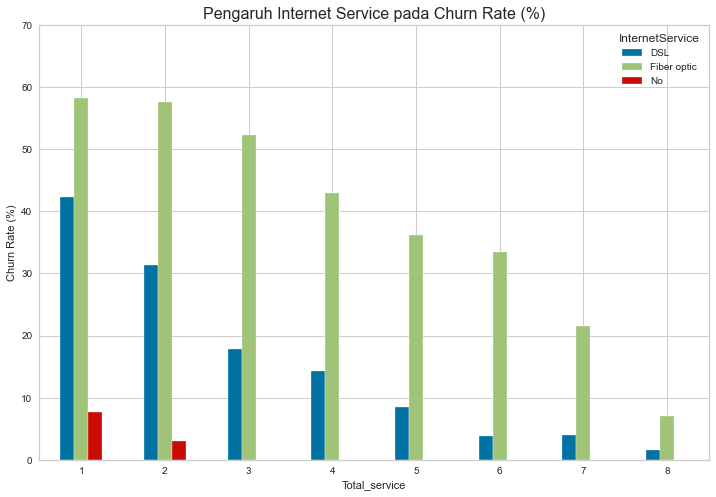

In [85]:
(pd.pivot_table(X_train,index='Total_service',columns='InternetService',values='Churn',aggfunc='mean')*100).plot(kind='bar',figsize=(12,8))
plt.ylim(0,70)
plt.xticks(rotation=0);
plt.ylabel('Churn Rate (%)')
plt.title('Pengaruh Internet Service pada Churn Rate (%)',fontsize=16)

Text(0.5, 1.0, 'Internet Service vs Monthly Charges')

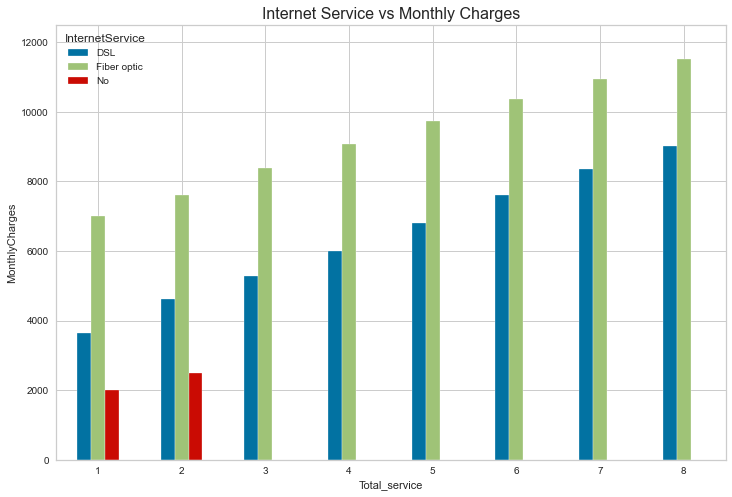

In [86]:
(pd.pivot_table(X_train,index='Total_service',columns='InternetService',values='MonthlyCharges',aggfunc='mean')*100).plot(kind='bar',figsize=(12,8))
plt.ylim(0,12500)
plt.xticks(rotation=0);
plt.ylabel('MonthlyCharges')
plt.title('Internet Service vs Monthly Charges',fontsize=16)

#### Observation

Dari 2 barchat diatas dapat disimpulkan bahwa harga fiber optic mempengaruhi churn rate. Pada analisa 9.1, kita tahu bahwa semakin banyak jumlah `Total_service` yang digunakan customer, churn rate semakin menurun. Tetapi, ketika kita analisa lebih lanjut, pada jumlah `Total_service` yang sama, churn rate berbeda signifikan antara yang menggunakan DSL dan Fiber Optic dan ini selaras dengan perbedaan harga `InternetService` DSL dan Fiber Optic. Meskipun jumlah `Total_service` yang digunakan semakin banyak, tetapi perbedaan harga tetap signifikan. Sehingga, untuk mengatasi churn rate yang tinggi adalah dengan memberikan diskon kepada customer

##### Harga internet service fiber optic mempengaruhi churn rate

### 9.3. Apa penyebab customer dengan `Contract` month to month memiliki churn rate tinggi?

Berdasarkan informasi pada 8.3 Analisa Customer Account, kita tahu bahwa customer yang menggunakan tipe `Contract` month-to-month memiliki churn rate yang sangat tinggi, yaitu 74.3%. Sedangkan `Contract` one year hanya 20,2% dan two year 5.6%

Text(0.5, 1.0, 'Contract vs Monthly Charges')

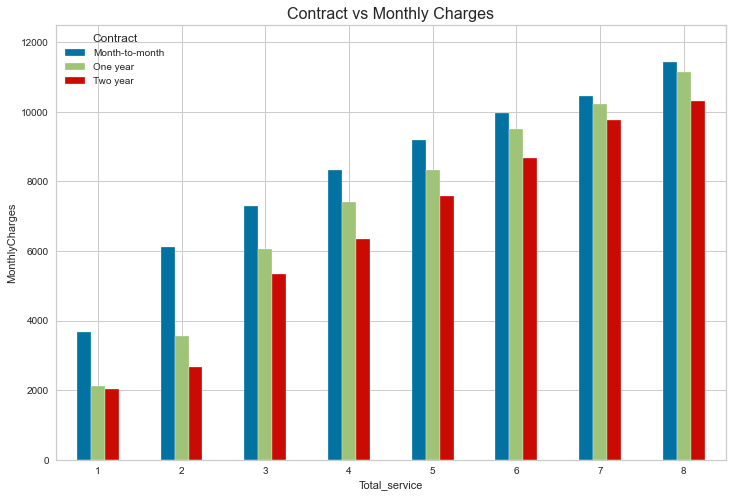

In [87]:
(pd.pivot_table(X_train,index='Total_service',columns='Contract',values='MonthlyCharges',aggfunc='mean')*100).plot(kind='bar',figsize=(12,8))
plt.ylim(0,12500)
plt.xticks(rotation=0);
plt.ylabel('MonthlyCharges')
plt.title('Contract vs Monthly Charges',fontsize=16)

In [88]:
round((pd.pivot_table(X_train,index='Total_service',columns='Contract',values='MonthlyCharges',aggfunc='mean')*100),1)

Contract,Month-to-month,One year,Two year
Total_service,,,
1,3684.3,2133.3,2024.2
2,6115.4,3550.8,2675.2
3,7292.9,6067.0,5349.6
4,8317.6,7417.7,6336.9
5,9191.8,8334.2,7586.5
6,9980.2,9512.5,8683.0
7,10454.9,10228.8,9760.3
8,11427.5,11153.7,10304.4


Text(0.5, 1.0, 'Contract vs Churn Rate(%)')

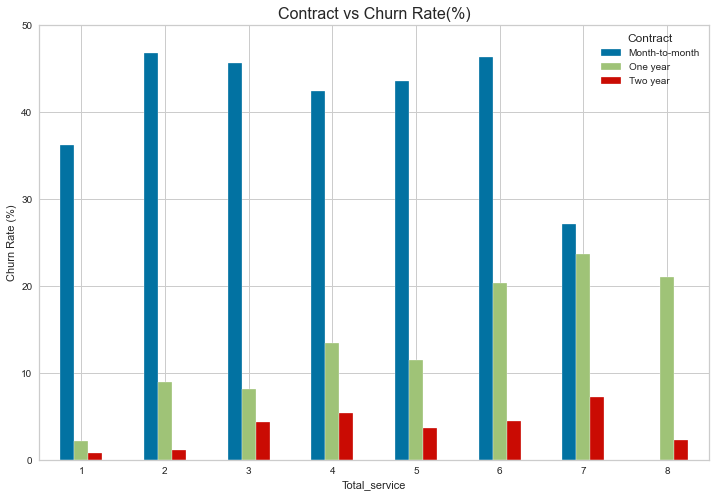

In [89]:
(pd.pivot_table(X_train,index='Total_service',columns='Contract',values='Churn',aggfunc='mean')*100).plot(kind='bar',figsize=(12,8))
plt.ylim(0,50)
plt.xticks(rotation=0);
plt.ylabel('Churn Rate (%)')
plt.title('Contract vs Churn Rate(%)',fontsize=16)

Text(0.5, 1.0, 'Contract vs Internet Service')

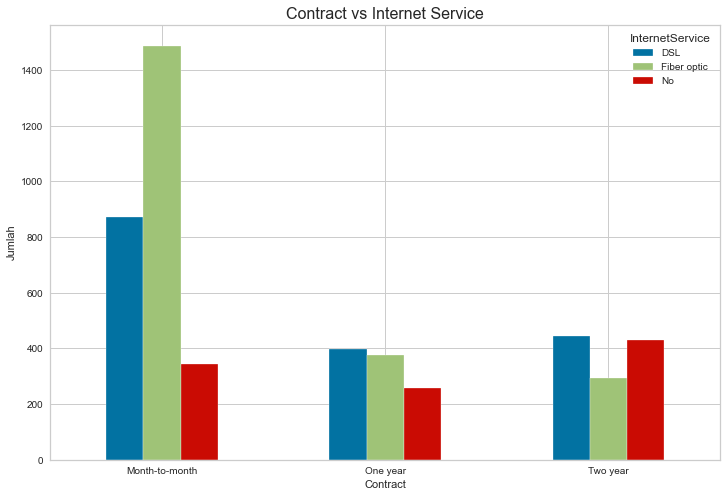

In [90]:
(pd.crosstab(X_train['Contract'],X_train['InternetService'])).plot(kind='bar',figsize=(12,8))
plt.xticks(rotation=0);
plt.ylabel('Jumlah')
plt.title('Contract vs Internet Service',fontsize=16)

#### Observation

Berdasarkan 3 barchart diatas, dapat diketahui bahwa, pada jumlah `Total_service` yang sama, customer dengan tipe `Contract` month-to-month selalu membayar service lebih mahal daripada yang lain. Selain itu, customer dengan tipe `Contract` month-to-month memiliki churn rate yang berbeda signifikan daripada yang lain pada setiap jumlah `Total_Service`. Customer `Contract` month-to-month adalah customer yang paling banyak berlangganan `InternetService` fiber optic. <br/>

##### Jadi dapat disimpulkan, bahwa harga `InternetService` fiber optic menyebabkan churn rate yang tinggi pada customer dengan `Contract` month-to-month


### 9.4 Bagaimana hubungan tenure dengan contract?

In [91]:
#binning Tenure
def bin_tenure(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [92]:
X_train['tenure_cat'] = X_train['tenure'].apply(bin_tenure)

In [93]:
X_train['tenure_cat'].unique()

array(['Over 48 Months', '12-24 Months', '0-12 Months', '24-48 Months'],
      dtype=object)

##### Tenure Cat vs Churn Rate

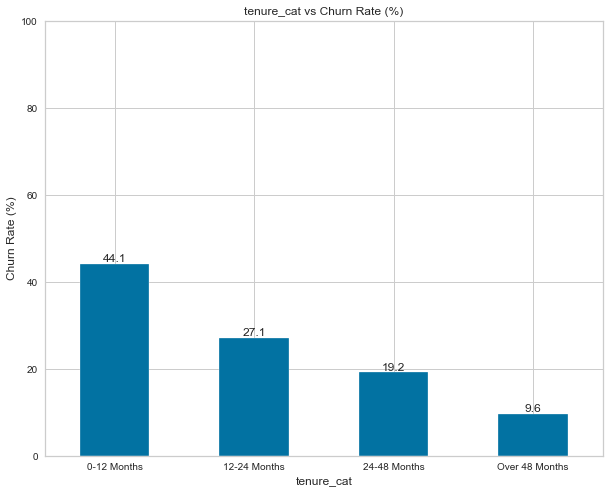

In [94]:
predictor_target ('tenure_cat')

In [95]:
chi_cek ('tenure_cat','Churn')

===== tenure_cat =====
Number Expected :
[[1111.42938659  400.57061341]
 [ 520.43122071  187.56877929]
 [ 838.71754636  302.28245364]
 [1136.42184634  409.57815366]]

Chi-square Statistic : 553.0779430816847 ,p-value: 1.4954330444497232e-119 kurang dari 0.05 
Target dan Predictor adalah variabel dependent



##### Tenure Cat vs Contract

Text(0.5, 1.0, 'Tenure vs Contract')

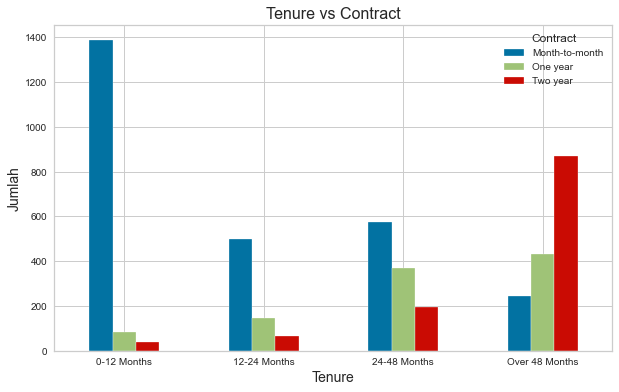

In [96]:
(pd.crosstab(X_train['tenure_cat'],X_train['Contract'])).plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0);
plt.ylabel('Jumlah',fontsize=14)
plt.xlabel('Tenure',fontsize=14)
plt.title('Tenure vs Contract',fontsize=16)

In [97]:
chi_cek('Contract','tenure_cat')

===== Contract =====
Number Expected :
[[832.87874465 389.99877726 628.5149786  851.60749949]
 [318.91583452 149.33360505 240.66333809 326.08722234]
 [360.20542083 168.66761769 271.82168331 368.30527817]]

Chi-square Statistic : 2157.4032647763224 ,p-value: 0.0 kurang dari 0.05 
Target dan Predictor adalah variabel dependent



#### Observation

Dari barchat hubungan tenure dengan churn rate, kita dapat mengetahui bahwa semakin lama masa tenur semakin rendah kecenderungan customer untuk churn. Customer-customer yang memiliki masa tenur 1 tahun memiliki churn rate yang tinggi.

Berdasarkan barchat hubungan tenure dengan contract, ternyata customer dengan masa tenur 1 tahun mayoritas mengambil contract month-to-month. Hal ini menjadi make sense karna customer dengan contract month-to-month memiliki churn rate yang tinggi yaitu 74,3%

### 9.5 Jenis service apa yang dipilih customer berdasarkan lamanya masa tenur?

##### Tenure Cat vs MonthlyCharges

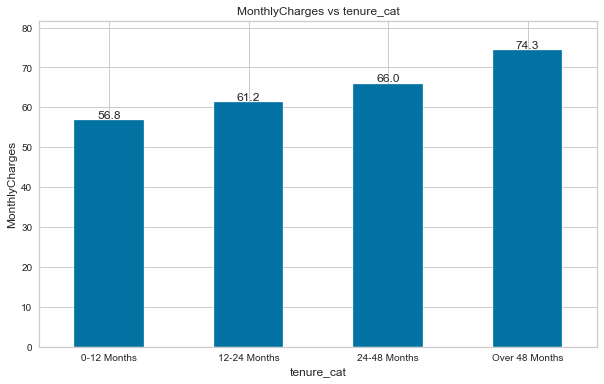

In [98]:
two_variable ('MonthlyCharges','tenure_cat')

In [99]:
m_1 = X_train[X_train['tenure_cat']=='0-12 Months']['MonthlyCharges']
m_2 = X_train[X_train['tenure_cat']=='12-24 Months']['MonthlyCharges']
m_3 = X_train[X_train['tenure_cat']=='24-48 Months']['MonthlyCharges']
m_4 = X_train[X_train['tenure_cat']=='Over 48 Months']['MonthlyCharges']


alpha = 0.05
ftest,p_value = f_oneway(m_1,m_2,m_3,m_4)

if p_value < alpha :
    print(x)
    print(f'Kesimpulan : nilai p_value {p_value} kurang dari alpha {alpha}, nilai ftest = {ftest}')
    print('Terdapat perbedaan monthly charges yang signifikan dari segi masa tenure')
    print()

else :
    print(x)
    print(f'Kesimpulan : nilai p_value {p_value} lebih dari alpha {alpha}, nilai ftest = {ftest}')
    print('Tidak terdapat perbedaan monthly charges yang signifikan dari segi masa tenure')
    print()

tenure
Kesimpulan : nilai p_value 3.1685008784110305e-61 kurang dari alpha 0.05, nilai ftest = 97.38574208004759
Terdapat perbedaan monthly charges yang signifikan dari segi masa tenure



##### Tenure Cat vs Total Service

Text(0.5, 1.0, 'Tenure vs Total Service')

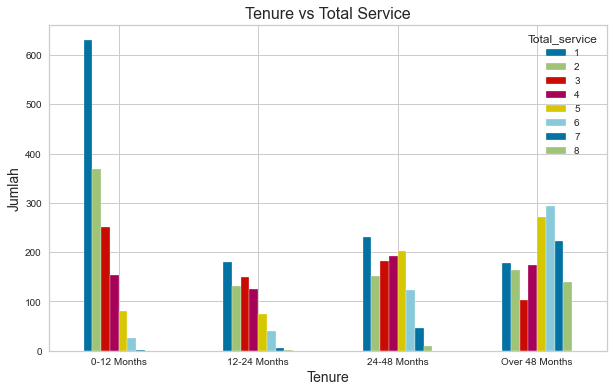

In [100]:
(pd.crosstab(X_train['tenure_cat'],X_train['Total_service'])).plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0);
plt.ylabel('Jumlah',fontsize=14)
plt.xlabel('Tenure',fontsize=14)
plt.title('Tenure vs Total Service',fontsize=16)
        

In [101]:
chi_cek('Total_service','tenure_cat')

===== Total_service =====
Number Expected :
[[375.30385164 175.73751783 283.21540656 383.74322397]
 [250.510699   117.3026289  189.04279601 256.1438761 ]
 [211.68616262  99.12288567 159.7446505  216.4463012 ]
 [199.66904422  93.49582229 150.67617689 204.15895659]
 [194.12268188  90.89871612 146.49072753 198.48787447]
 [149.13552068  69.83329937 112.54208274 152.48909721]
 [ 85.04422254  39.82229468  64.17689016  86.95659262]
 [ 46.5278174   21.78683513  35.11126961  47.57407785]]

Chi-square Statistic : 1474.4345053535048 ,p-value: 1.0569654670682022e-299 kurang dari 0.05 
Target dan Predictor adalah variabel dependent



##### Tenure Cat vs Top 5 Expensive Services

In [102]:
top5_expservice = ['InternetService','StreamingTV','StreamingMovies','DeviceProtection','OnlineBackup']

In [103]:
def service_tenure (s,t='tenure_cat') : 
    
    if s!='InternetService' : 
        a0 = pd.crosstab(X_train[s],X_train[t]).unstack(level=1).reset_index()
        a1 = a0

        a0 = a0[a0[s]==0]
        a0 = a0.drop(s,axis=1)
        a0 = a0.rename(columns={0:'count0'})

        a1 = a1[a1[s]==1]
        a1 = a1.drop(s,axis=1)
        a1 = a1.rename(columns={0:'count1'})

        total_a = [a0,a1]
        final_a = reduce(lambda left,right: pd.merge(left,right,on=[t],
                                                how='outer'), total_a)
        final_a['sum'] = (final_a['count0']+final_a['count1'])
        final_a['percent'] = round(((final_a['count1']/final_a['sum'])*100),2)

        plt.figure(figsize=(10,6))
        ax = sns.barplot(data=final_a, x=t, y='percent',errwidth=0)    
        plt.title(f'Subscribe Rate {s} vs Tenure')
        plt.ylabel('Subscribe Rate (%)')
        plt.xlabel('Tenure')
        plt.ylim (0,100)

        for x in ax.containers :
            ax.bar_label(x,)
            
    elif s=='InternetService' : 
        bD = pd.crosstab(X_train[s],X_train[t]).unstack(level=1).reset_index()
        bF = bD
        bN = bD
        
        bD = bD[bD[s]=='DSL']
        bD = bD.drop(s,axis=1)
        bD = bD.rename(columns={0:'countDSL'})
        
        bF = bF[bF[s]=='Fiber optic']
        bF = bF.drop(s,axis=1)
        bF = bF.rename(columns={0:'countFO'})
        bF
        
        bN = bN[bN[s]=='No']
        bN = bN.drop(s,axis=1)
        bN = bN.rename(columns={0:'countNo'})
        
        total_b = [bD,bF,bN]
        final_b = reduce(lambda left,right: pd.merge(left,right,on=[t],
                                                how='outer'), total_b)
        final_b['sum'] = final_b['countDSL'] + final_b['countFO'] + final_b['countNo']
        final_b['percentD'] = round(((final_b['countDSL']/final_b['sum'])*100),2)
        final_b['percentF'] = round(((final_b['countFO']/final_b['sum'])*100),2)
        
        plt.figure(figsize=(10,6))
        ax = sns.barplot(data=final_b, x=t, y='percentD',errwidth=0)    
        plt.title(f'Subscribe Rate {s}-DSL vs Tenure')
        plt.ylabel('Subscribe Rate (%)')
        plt.xlabel('Tenure')
        plt.ylim (0,100)
        
        for x in ax.containers :
            ax.bar_label(x,)
        
        plt.figure(figsize=(10,6)) 
        ax = sns.barplot(data=final_b, x=t, y='percentF',errwidth=0)    
        plt.title(f'Subscribe Rate {s}-Fiber Optic vs Tenure')
        plt.ylabel('Subscribe Rate (%)')
        plt.xlabel('Tenure')
        plt.ylim (0,100)
        

        for x in ax.containers :
            ax.bar_label(x,)
        
        plt.show()

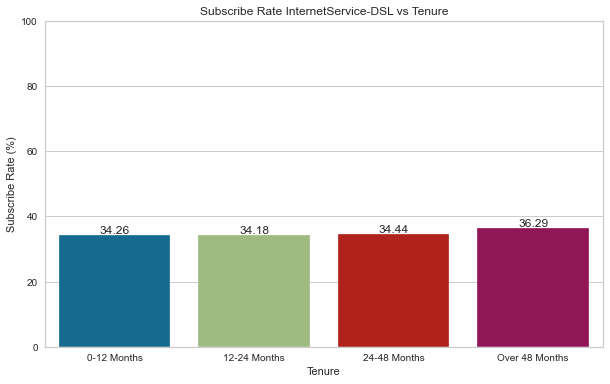

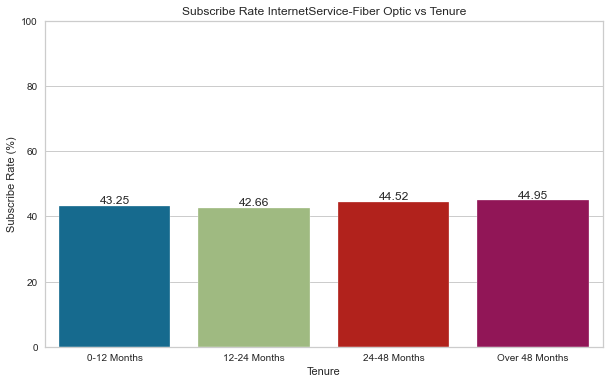

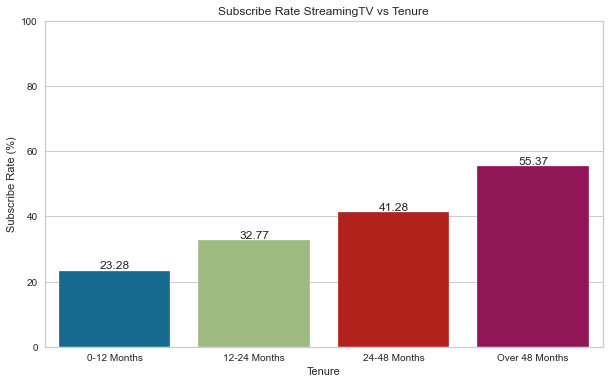

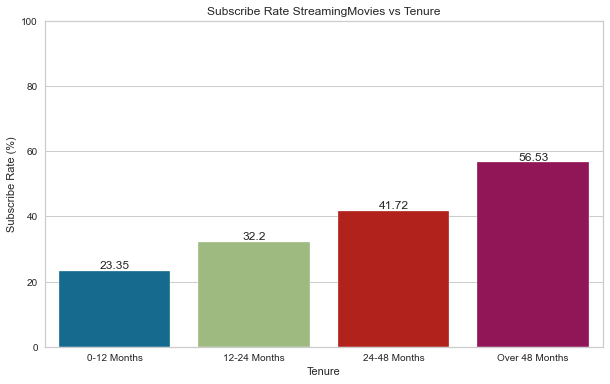

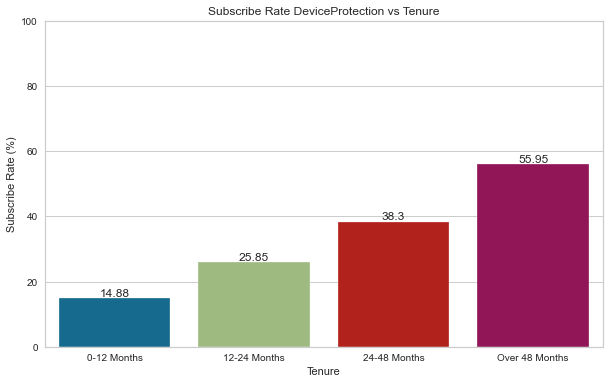

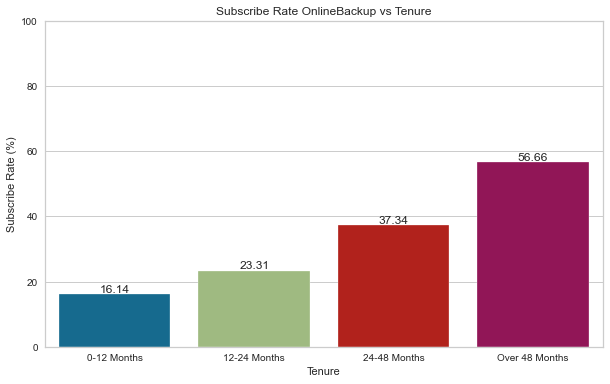

In [104]:
for x in top5_expservice :
    service_tenure(x)

In [105]:
for s in top5_expservice :
    chi_cek (s,'tenure_cat')

===== InternetService =====
Number Expected :
[[528.13694722 247.30222132 398.54778887 540.01304259]
 [665.2553495  311.50845731 502.021398   680.21479519]
 [318.60770328 149.18932138 240.43081312 325.77216222]]

Chi-square Statistic : 8.909822146187853 ,p-value: 0.17871348924916 lebih dari 0.05 
Target dan Predictor adalah variabel independent

===== StreamingTV =====
Number Expected :
[[923.16119829 432.27389444 696.64479315 943.92011412]
 [588.83880171 275.72610556 444.35520685 602.07988588]]

Chi-square Statistic : 345.38917801543914 ,p-value: 1.4860702985702786e-74 kurang dari 0.05 
Target dan Predictor adalah variabel dependent

===== StreamingMovies =====
Number Expected :
[[916.99857347 429.38822091 691.99429387 937.61891176]
 [595.00142653 278.61177909 449.00570613 608.38108824]]

Chi-square Statistic : 371.3454669456979 ,p-value: 3.559183390059012e-80 kurang dari 0.05 
Target dan Predictor adalah variabel dependent

===== DeviceProtection =====
Number Expected :
[[ 985.095577

######  Tenure Cat vs Cheeper Services

In [106]:
cheeper_service = ['MultipleLines','OnlineSecurity','TechSupport']

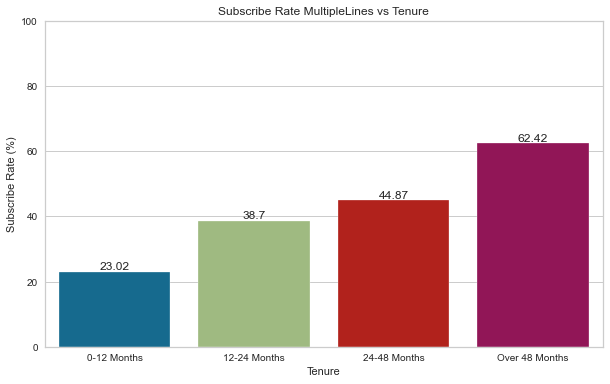

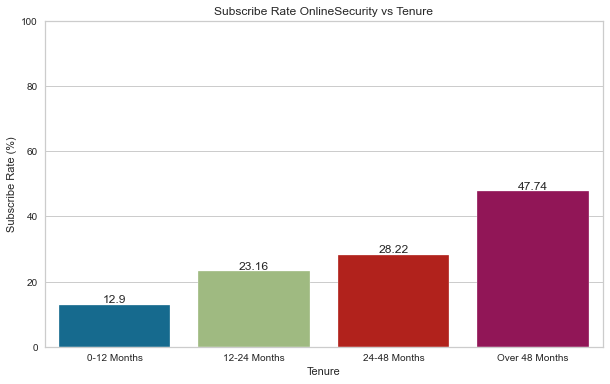

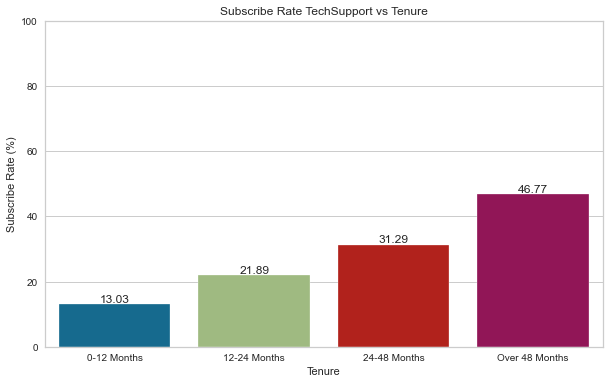

In [107]:
for s in cheeper_service :
    service_tenure (s)

In [108]:
for s in cheeper_service :
    chi_cek (s,'tenure_cat')

===== MultipleLines =====
Number Expected :
[[865.23252496 405.14856328 652.93009986 884.6888119 ]
 [646.76747504 302.85143672 488.06990014 661.3111881 ]]

Chi-square Statistic : 491.73981306145043 ,p-value: 2.9426904245624394e-106 kurang dari 0.05 
Target dan Predictor adalah variabel dependent

===== OnlineSecurity =====
Number Expected :
[[1074.7617689   503.26146322  811.04707561 1098.92969228]
 [ 437.2382311   204.73853678  329.95292439  447.07030772]]

Chi-square Statistic : 466.8177290276634 ,p-value: 7.400468346917055e-101 kurang dari 0.05 
Target dan Predictor adalah variabel dependent

===== TechSupport =====
Number Expected :
[[1070.75606277  501.38577542  808.02425107 1094.83391074]
 [ 441.24393723  206.61422458  332.97574893  451.16608926]]

Chi-square Statistic : 442.84212093432365 ,p-value: 1.1590366854321693e-95 kurang dari 0.05 
Target dan Predictor adalah variabel dependent



#### Observation 

Dari barchat hubungan tenure dengan churn dan monthly charges serta uji statistik, dapat diketahui bahwa :

1. Customer dengan masa tenur kurang dari 1 tahun memiliki churn rate yang sangat tinggi dibandingkan yang lain, yaitu 44.1%
2. Meskipun customer sudah lama menggunakan layanan (2-lebih dari 3 tahun), customer masih memiliki kecenderungan untuk churn
3. Monthly charges sebanding dengan peningkatan masa tenure, hal ini dikarenakan semakin lama masa tenur, semakin meningkat jumlah service yang digunakan customer

Berikut adalah jumlah service yang signifikan digunakan customer berdasarkan lamanya masa tenur :

1. 0-12 months = 1 service
2. 12-24 months = 1-4 service
3. 24-48 months = 1-5 service
4. Over 48 months = 5-6 service

##### Berikut adalah kesimpulan jenis service yang digunakan customer berdasarkan lama tenur

1. 0-12 months = Fiber Optic
2. 12 - 24 months = Fiber Optic, MultipleLines, DSL, Streaming TV / Streaming Movies
3. 24-48 months = MultipleLines, Fiber Optic, Streaming TV / Streaming Movies, Device Protection, Online Backup
4. Over 48 months = MultipleLines, Online Backup, Streaming Movies, Device Protection, Streaming TV, Online Security

# Data Preprocessing

In [109]:
info_data(X_train)

Number of Rows,Columns (4907, 22)
Number of Duplicated Values 0


,Missing_value,Percent_missing_%,Data_type,Number of Unique
gender,0,0.0,object,2
SeniorCitizen,0,0.0,int64,2
Total_service,0,0.0,int64,8
Churn,0,0.0,int64,2
TotalCharges,0,0.0,float64,4645
MonthlyCharges,0,0.0,float64,1432
PaymentMethod,0,0.0,object,4
PaperlessBilling,0,0.0,int64,2
Contract,0,0.0,object,3
StreamingMovies,0,0.0,int64,2


##### Berdasrkan hasil EDA, kita tahu bahwa `gender` dan `PhoneService` tidak mempengaruhi churn rate, maka akan didrop. Selain itu, feature `tenure_cat` juga akan didrop karna sudah terwakilkan olen `tenure`

In [110]:
X_train_c = X_train.copy()

In [111]:
X_train_c = X_train.drop(['gender','PhoneService','tenure_cat'],axis=1)

In [112]:
info_data(X_train_c)

Number of Rows,Columns (4907, 19)
Number of Duplicated Values 8


,Missing_value,Percent_missing_%,Data_type,Number of Unique
SeniorCitizen,0,0.0,int64,2
StreamingTV,0,0.0,int64,2
Churn,0,0.0,int64,2
TotalCharges,0,0.0,float64,4645
MonthlyCharges,0,0.0,float64,1432
PaymentMethod,0,0.0,object,4
PaperlessBilling,0,0.0,int64,2
Contract,0,0.0,object,3
StreamingMovies,0,0.0,int64,2
TechSupport,0,0.0,int64,2


## 10. Replace Object to Numeric - Train

### 10.1 Rank Encoding

##### Internet Service

In [113]:
InternetS_dict = {'No' : 0, 'DSL' : 1, 'Fiber optic' : 2}

In [114]:
X_train_c['InternetService'] = X_train_c['InternetService'].map(InternetS_dict)

In [115]:
X_train_c['InternetService'].unique()

array([2, 0, 1], dtype=int64)

##### Contract

In [116]:
X_train_c['Contract'].unique()

array(['One year', 'Two year', 'Month-to-month'], dtype=object)

In [117]:
Contract_dict = {
    'Month-to-month' : 0,
    'One year' : 1,
    'Two year' : 2}

In [118]:
X_train_c['Contract'] = X_train_c['Contract'].map(Contract_dict)

In [119]:
X_train_c['Contract'].unique()

array([1, 2, 0], dtype=int64)

### 10.2 One Hot Encoding

In [120]:
X_train_c= pd.get_dummies(X_train_c,columns=['PaymentMethod'])

In [121]:
X_train_c.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Total_service,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2761,0,1,0,64,1,2,1,1,1,1,1,1,1,1,115.00,7396.15,0,8,0,0,1,0
2625,0,1,0,63,1,2,1,0,0,1,0,0,2,1,84.65,5377.80,0,4,0,1,0,0
2948,0,1,1,20,1,2,0,1,1,0,1,1,0,1,105.85,2239.65,1,6,1,0,0,0
1995,1,0,0,9,0,2,0,0,1,0,0,0,0,0,75.50,637.40,0,2,0,1,0,0
3879,1,1,0,72,1,2,1,1,0,0,1,1,1,1,106.85,7677.40,0,6,1,0,0,0


In [122]:
X_train_c=X_train_c.drop('PaymentMethod_Credit card (automatic)',axis=1) #menghindari perfect multicolinearity
X_train_c.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Total_service,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2761,0,1,0,64,1,2,1,1,1,1,1,1,1,1,115.00,7396.15,0,8,0,1,0
2625,0,1,0,63,1,2,1,0,0,1,0,0,2,1,84.65,5377.80,0,4,0,0,0
2948,0,1,1,20,1,2,0,1,1,0,1,1,0,1,105.85,2239.65,1,6,1,0,0
1995,1,0,0,9,0,2,0,0,1,0,0,0,0,0,75.50,637.40,0,2,0,0,0
3879,1,1,0,72,1,2,1,1,0,0,1,1,1,1,106.85,7677.40,0,6,1,0,0


## 11. Feature Selection

In [123]:
X_train_c = X_train_c.drop('Churn',axis=1)

In [124]:
mi = mutual_info_classif(X_train_c, y_train,random_state=42)

<AxesSubplot:>

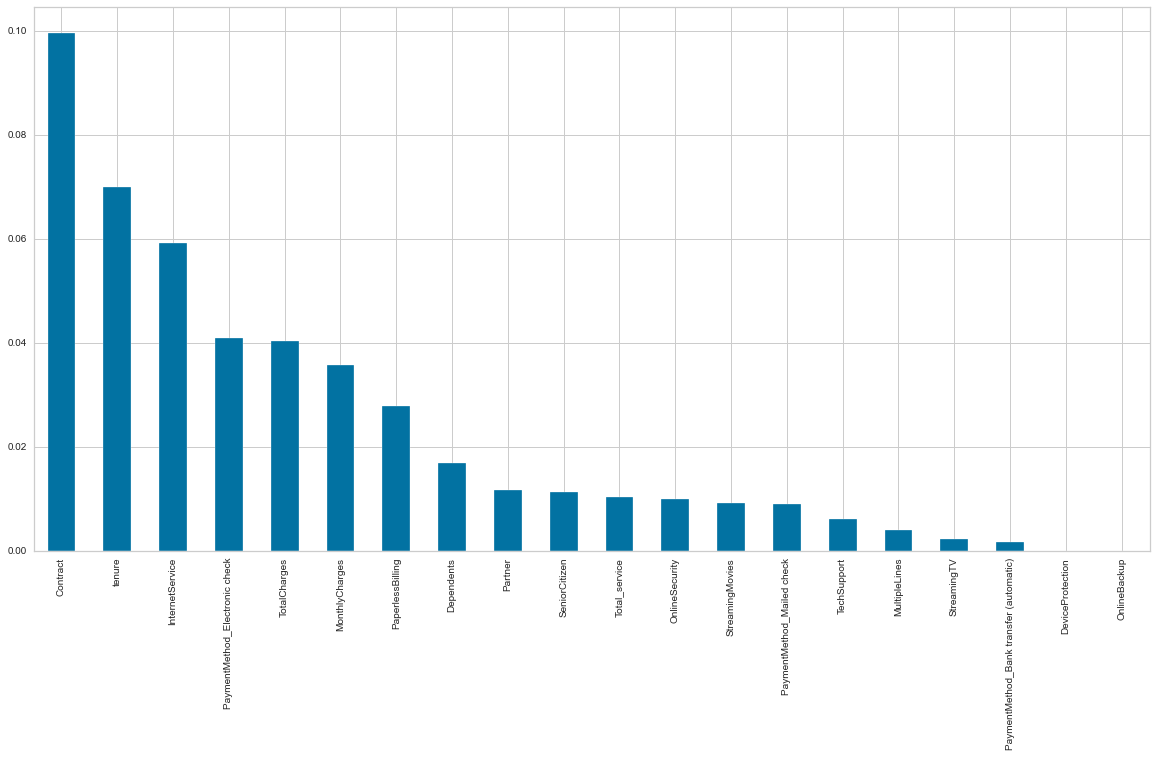

In [125]:
mi = pd.Series(mi)
mi.index = X_train_c.columns
mi.sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

In [126]:
#select top 10 features
X_train_c1 = X_train_c.drop(['Total_service','OnlineSecurity','StreamingMovies','PaymentMethod_Mailed check',
                           'TechSupport','MultipleLines','StreamingTV','PaymentMethod_Bank transfer (automatic)',
                            'DeviceProtection','OnlineBackup'],axis=1)
X_train_c1.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Electronic check
2761,0,1,0,64,2,1,1,115.00,7396.15,1
2625,0,1,0,63,2,2,1,84.65,5377.80,0
2948,0,1,1,20,2,0,1,105.85,2239.65,0
1995,1,0,0,9,2,0,0,75.50,637.40,0
3879,1,1,0,72,2,1,1,106.85,7677.40,0


## 12. Replace Object to Numeric - Test

In [127]:
X_test['Partner'] = X_test['Partner'].replace(['Yes','No'],[1,0])

X_test['Dependents'] = X_test['Dependents'].replace(['Yes','No'],[1,0])

X_test['PhoneService'] = X_test['PhoneService'].replace(['Yes','No'],[1,0])

X_test['PaperlessBilling'] = X_test['PaperlessBilling'].replace(['Yes','No'],[1,0])

X_test['OnlineSecurity'] = X_test['OnlineSecurity'].replace(['Yes','No','No internet service'],[1,0,0]) 

X_test['OnlineBackup'] = X_test['OnlineBackup'].replace(['Yes','No','No internet service'],[1,0,0]) 
 
X_test['DeviceProtection'] = X_test['DeviceProtection'].replace(['Yes','No','No internet service'],[1,0,0]) 

X_test['TechSupport'] = X_test['TechSupport'].replace(['Yes','No','No internet service'],[1,0,0]) 

X_test['StreamingTV'] = X_test['StreamingTV'].replace(['Yes','No','No internet service'],[1,0,0]) 

X_test['StreamingMovies'] = X_test['StreamingMovies'].replace(['Yes','No','No internet service'],[1,0,0]) 

X_test['MultipleLines'] = X_test['MultipleLines'].replace(['Yes','No','No phone service'],[1,0,0]) 

X_test['InternetService'] = X_test['InternetService'].map(InternetS_dict)

X_test['Contract'] = X_test['Contract'].map(Contract_dict)

X_test= pd.get_dummies(X_test,columns=['PaymentMethod'])

X_test=X_test.drop('PaymentMethod_Credit card (automatic)',axis=1)

X_test.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4694,Male,1,0,0,54,0,0,1,0,1,1,0,1,1,1,1,55.45,2966.95,0,0,1,0
3664,Female,0,1,1,33,1,1,0,0,0,0,0,0,0,0,0,24.25,838.50,0,1,0,0
980,Male,0,0,0,1,1,1,2,0,0,0,0,0,1,0,1,86.60,86.60,1,0,1,0
958,Male,0,0,0,17,1,0,0,0,0,0,0,0,0,1,1,20.50,365.80,0,0,0,1
58,Female,0,1,1,34,1,1,0,0,0,0,0,0,0,2,0,24.95,894.30,0,0,0,0


In [128]:
X_test['Total_service'] = X_test['PhoneService'] + X_test['MultipleLines'] + X_test['OnlineSecurity'] + X_test['OnlineBackup'] + X_test['DeviceProtection'] + X_test ['TechSupport'] + X_test['StreamingTV'] + X_test['StreamingMovies']
X_test['Total_service'] = X_test['Total_service'].replace(0,1)

In [129]:
X_test_c = X_test.copy()

In [130]:
X_test_c = X_test_c[X_train_c1.columns]
X_test_c.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Electronic check
4694,1,0,0,54,1,1,1,55.45,2966.95,1
3664,0,1,1,33,0,0,0,24.25,838.50,0
980,0,0,0,1,2,0,1,86.60,86.60,1
958,0,0,0,17,0,1,1,20.50,365.80,0
58,0,1,1,34,0,2,0,24.95,894.30,0


In [131]:
X_train_c1.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Electronic check
2761,0,1,0,64,2,1,1,115.00,7396.15,1
2625,0,1,0,63,2,2,1,84.65,5377.80,0
2948,0,1,1,20,2,0,1,105.85,2239.65,0
1995,1,0,0,9,2,0,0,75.50,637.40,0
3879,1,1,0,72,2,1,1,106.85,7677.40,0


## 13. Feature Transformation

In [132]:
feature_t = ['tenure','MonthlyCharges','TotalCharges']

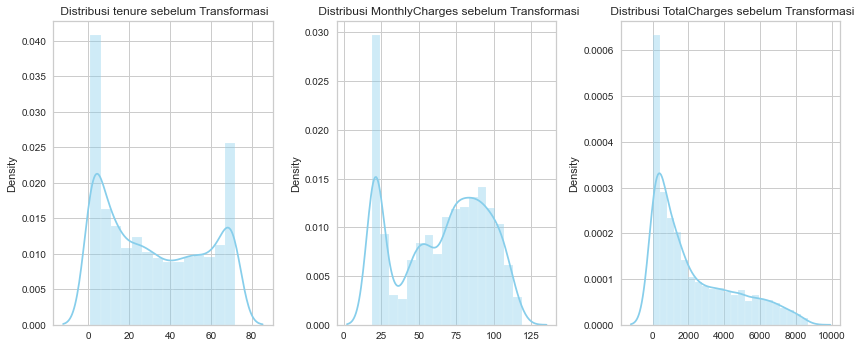

In [133]:
plt.figure(figsize=(12,5))

for x in range(0, len(feature_t)):
    plt.subplot(1, len(feature_t), x+1)
    sns.distplot(x=X_train_c1[feature_t[x]], color='skyblue')
    plt.title(f' Distribusi {feature_t[x]} sebelum Transformasi')
    plt.tight_layout()

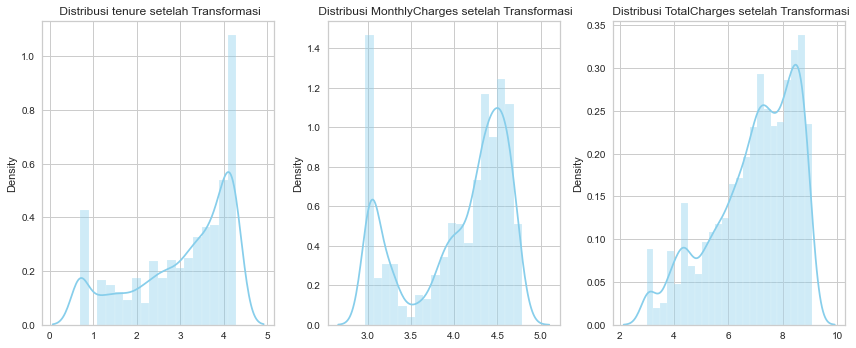

In [134]:
plt.figure(figsize=(12,5))

for x in range(0, len(feature_t)):
    plt.subplot(1, len(feature_t), x+1)
    sns.distplot(x=np.log1p(X_train_c1[feature_t[x]]), color='skyblue')
    plt.title(f' Distribusi {feature_t[x]} setelah Transformasi')
    plt.tight_layout()

##### Transformasi feature `TotalCharges` , sedangkan feature `tenure` dan `MonthlyCharges` tetap mengikuti distribusi awal 

In [135]:
X_train_c1['TotalCharges'] = np.log1p(X_train_c1['TotalCharges'])

## 14. Feature Scalling

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

##### Data Train

In [137]:
X_train_c1.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Electronic check
2761,0,1,0,64,2,1,1,115.00,8.908850,1
2625,0,1,0,63,2,2,1,84.65,8.590221,0
2948,0,1,1,20,2,0,1,105.85,7.714521,0
1995,1,0,0,9,2,0,0,75.50,6.458965,0
3879,1,1,0,72,2,1,1,106.85,8.946166,0


In [138]:
feature_s = ['SeniorCitizen','Partner','Dependents','tenure', 'InternetService','Contract','PaperlessBilling', 'MonthlyCharges', 'TotalCharges']

In [139]:
X_train_c1[feature_s] = scaler.fit_transform(X_train_c1[feature_s])

In [140]:
X_train_c1.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Electronic check
2761,-0.438380,1.035900,-0.653352,1.298291,0.996561,0.375976,0.823866,1.665250,1.274416,1
2625,-0.438380,1.035900,-0.653352,1.257314,0.996561,1.578660,0.823866,0.652556,1.066836,0
2948,-0.438380,1.035900,1.530570,-0.504714,0.996561,-0.826707,0.823866,1.359940,0.496337,0
1995,2.281127,-0.965344,-0.653352,-0.955465,0.996561,-0.826707,-1.213790,0.347246,-0.321630,0
3879,2.281127,1.035900,-0.653352,1.626110,0.996561,0.375976,0.823866,1.393307,1.298726,0


##### Data Test

In [141]:
X_test_c['TotalCharges'] = np.log1p(X_test_c['TotalCharges'])

In [142]:
X_test_c[feature_s] = scaler.fit_transform(X_test_c[feature_s])

In [143]:
X_test_c.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Electronic check
4694,2.237984,-0.976036,-0.654728,0.847703,-0.277301,0.359992,0.838352,-0.296019,0.674285,1
3664,-0.446831,1.024552,1.527352,0.000192,-1.547809,-0.834115,-1.192816,-1.326631,-0.146556,0
980,-0.446831,-0.976036,-0.654728,-1.291254,0.993208,-0.834115,0.838352,0.732942,-1.615587,1
958,-0.446831,-0.976036,-0.654728,-0.645531,-1.547809,0.359992,0.838352,-1.450503,-0.684754,0
58,-0.446831,1.024552,1.527352,0.040550,-1.547809,1.554100,-1.192816,-1.303508,-0.104726,0


## 15. Over Sampling

In [144]:
from imblearn.over_sampling import SMOTE

In [145]:
smote = SMOTE(0.5,random_state=42)

In [146]:
pd.Series(y_train).value_counts()

0    3607
1    1300
Name: Churn, dtype: int64

In [147]:
X_train_re,y_train_re = smote.fit_resample(X_train_c1,y_train)

In [148]:
pd.Series(y_train_re).value_counts()

0    3607
1    1803
Name: Churn, dtype: int64

# Model,Evaluation, Feature Importance

## 16. Model

### 16.1 Logistic Regression

In [149]:
logreg_model = LogisticRegression(random_state=42,class_weight='balance')

 Recall Score : 0.5061538461538462
 Precision Score : 0.6666666666666666
 F1 Score : 0.5754263226934848
 ROC-AUC Score : 0.7074711565119106


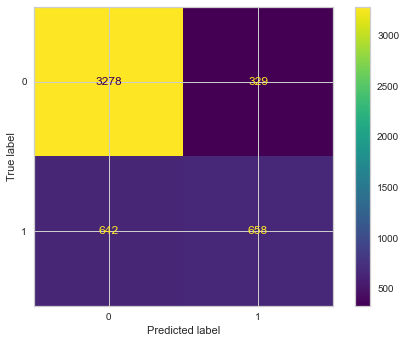

In [150]:
eval_train(X_train_c1,y_train,logreg_model)

 Recall Score : 0.5116696588868941
 Precision Score : 0.6690140845070423
 F1 Score : 0.5798575788402849
 ROC-AUC Score : 0.710233277050174


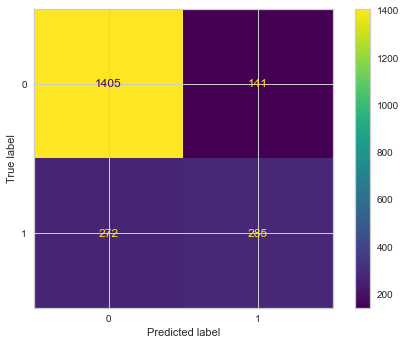

In [151]:
eval_test(X_test_c,y_test,logreg_model)

#### Over Sampling SMOTE

 Recall Score : 0.6389351081530782
 Precision Score : 0.6844919786096256
 F1 Score : 0.6609294320137693
 ROC-AUC Score : 0.7458606785567164


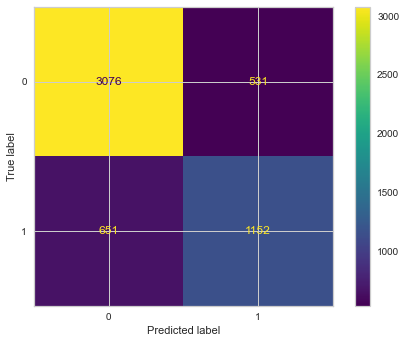

In [152]:
eval_train(X_train_re,y_train_re,logreg_model)

 Recall Score : 0.6481149012567325
 Precision Score : 0.6224137931034482
 F1 Score : 0.635004397537379
 ROC-AUC Score : 0.753229507549453


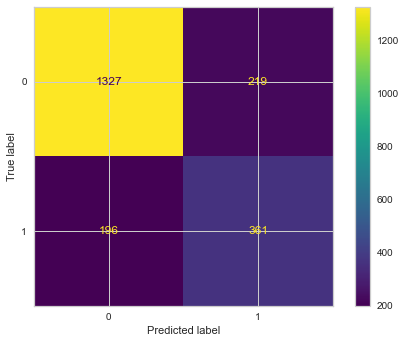

In [153]:
eval_test(X_test_c,y_test,logreg_model)

### 16.2 KNN

In [154]:
knn_model = KNeighborsClassifier()

 Recall Score : 0.6276923076923077
 Precision Score : 0.7541589648798521
 F1 Score : 0.6851385390428212
 ROC-AUC Score : 0.7769734064106119


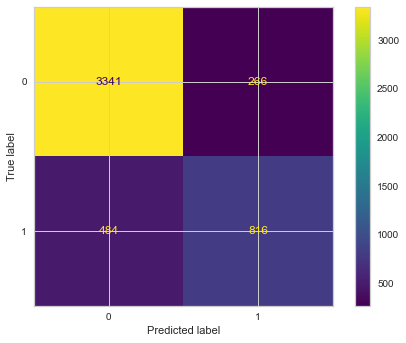

In [155]:
eval_train(X_train_c1,y_train,knn_model)

 Recall Score : 0.4793536804308797
 Precision Score : 0.5717344753747323
 F1 Score : 0.521484375
 ROC-AUC Score : 0.6749937871753364


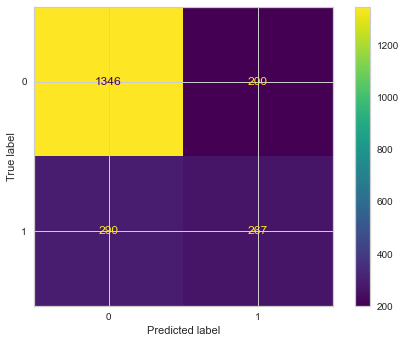

In [156]:
eval_test(X_test_c,y_test,knn_model)

### 16.3 Naive Bayes

In [157]:
naive = GaussianNB()

 Recall Score : 0.7330769230769231
 Precision Score : 0.5335946248600224
 F1 Score : 0.6176279974076474
 ROC-AUC Score : 0.7510685419376854


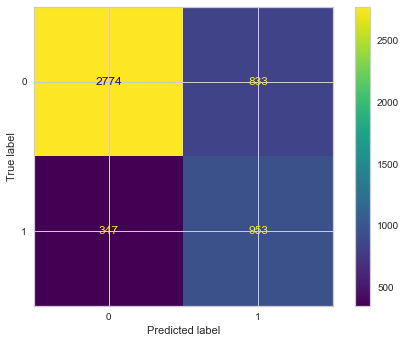

In [158]:
eval_train(X_train_c1,y_train,naive)

 Recall Score : 0.7271095152603232
 Precision Score : 0.531496062992126
 F1 Score : 0.6141015921152388
 ROC-AUC Score : 0.7480955079535769


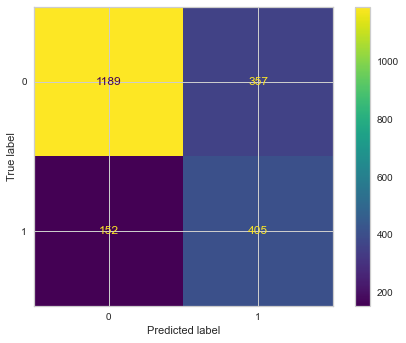

In [159]:
eval_test(X_test_c,y_test,naive)

##### Over Sampling Naive Bayes

 Recall Score : 0.762063227953411
 Precision Score : 0.6028960070206231
 F1 Score : 0.6731994120529152
 ROC-AUC Score : 0.7555811010851058


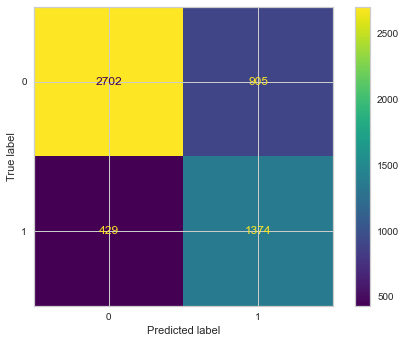

In [160]:
eval_train(X_train_re,y_train_re,naive)

 Recall Score : 0.7612208258527827
 Precision Score : 0.5189718482252142
 F1 Score : 0.6171761280931587
 ROC-AUC Score : 0.7535082137025879


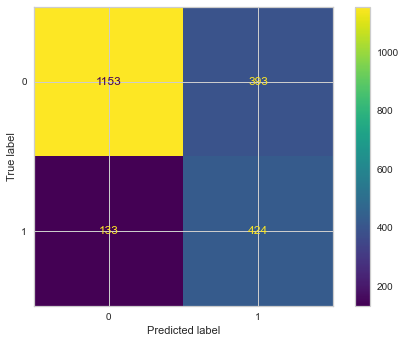

In [161]:
eval_test(X_test_c,y_test,naive)

### 16.4 Decision Tree

In [162]:
dt = DecisionTreeClassifier(random_state=42)

 Recall Score : 0.9861538461538462
 Precision Score : 1.0
 F1 Score : 0.9930286599535244
 ROC-AUC Score : 0.9930769230769231


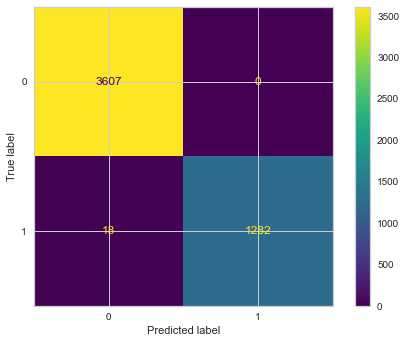

In [163]:
eval_train(X_train_c1,y_train,dt)

 Recall Score : 0.48473967684021546
 Precision Score : 0.47202797202797203
 F1 Score : 0.47829937998228517
 ROC-AUC Score : 0.6446984283295516


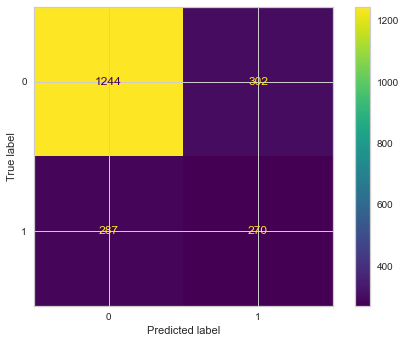

In [164]:
eval_test(X_test_c,y_test,dt)

### 16.5 Random Forest

In [165]:
rf = RandomForestClassifier(random_state=42)

 Recall Score : 0.9892307692307692
 Precision Score : 0.9968992248062015
 F1 Score : 0.993050193050193
 ROC-AUC Score : 0.994060907210339


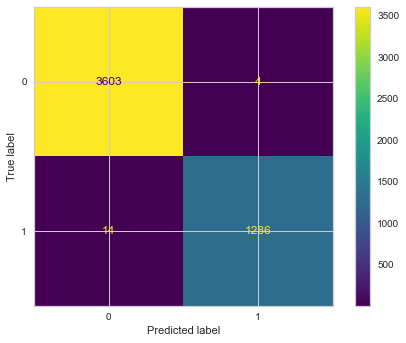

In [166]:
eval_train(X_train_c1,y_train,rf)

 Recall Score : 0.4757630161579892
 Precision Score : 0.6148491879350348
 F1 Score : 0.5364372469635628
 ROC-AUC Score : 0.6841945740557088


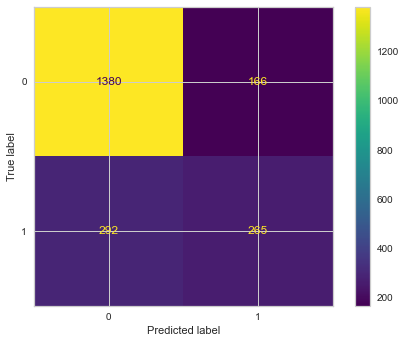

In [167]:
eval_test(X_test_c,y_test,rf)

In [168]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100, 300, 500, 600, 800]
max_depth = [5, 8,10, 15 ,20, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10,20,30] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = RandomizedSearchCV(rf, hyperF, cv =5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_c1, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


 Recall Score : 0.5015384615384615
 Precision Score : 0.6928799149840595
 F1 Score : 0.5818830879071842
 ROC-AUC Score : 0.7107082382546758


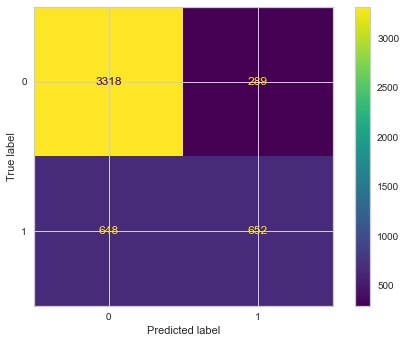

In [169]:
eval_test(X_train_c1,y_train,bestF)

 Recall Score : 0.47755834829443444
 Precision Score : 0.6700251889168766
 F1 Score : 0.5576519916142558
 ROC-AUC Score : 0.6964117744059494


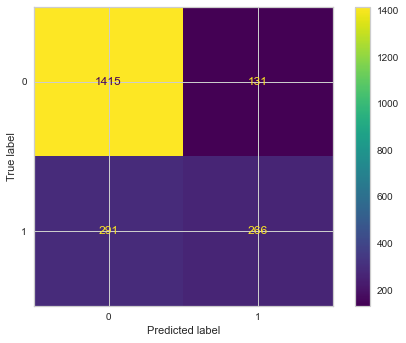

In [170]:
eval_test(X_test_c,y_test,bestF)

##### Dari beberapa model yang diuji, model yang dipilih adalah Naive Bayes dengan Over Sampling, karna memiliki f-1 score  yang relatif tinggi dibandingkan yang lain yaitu 61%. Model tersebut juga memiliki Recall yang paling tinggi yaitu 76%, hal ini berarti model sudah cukup bagus untuk meminimalisir terjadinya false negatif. Selain itu, model memiliki kemampuan untuk membedakan 0 dan 1 paling tinggi yaitu sebesar 75%

## 17. Evaluation

### 17.1 ROC Curve

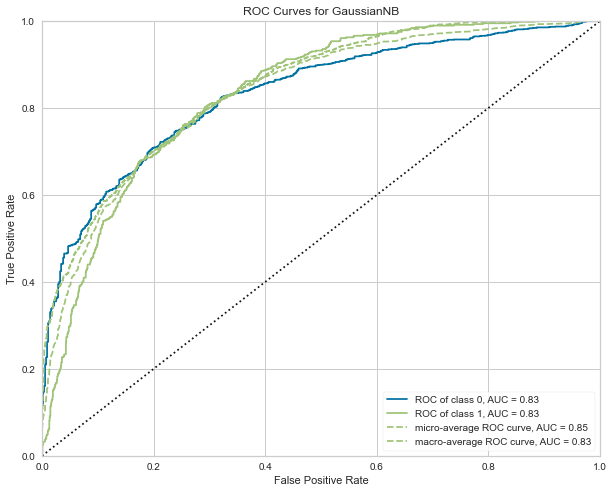

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [171]:
#grafik ROC
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(10,8))
oz = ROCAUC(naive)
oz.fit(X_train_re, y_train_re)
oz.score(X_test_c, y_test)
oz.show()

### 17.2 Profit Curve

In [173]:
def standard_confusion_matrix(y_true, y_pred):
    
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

#### Asumsi

Jika kita memprediksi customer tidak churn, tetapi aktual customer churn maka perusahaan akan rugi sebanyak $150 dollar/customer. Tetapi jika kita mampu memprediksi customer yang churn dan aktual churn maka perusahaan akan mendapatkan net profit 175 dollar/orang

Text(0.5, 0, 'Population')

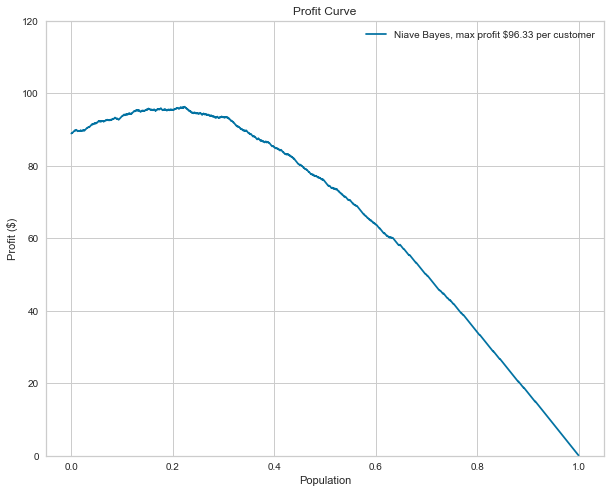

In [190]:
y_proba = naive.predict_proba(X_test_c)[:,1]
thresholds = sorted(y_proba, reverse=True)

costbenefit_mat = np.array([[0, 0],
                        [-150, 175]])
profits = []

for T in thresholds:
    y_pred = (y_proba>T).astype(int)
    confusion_mat = standard_confusion_matrix(y_test, y_pred)
    profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
    profits.append(profit)

max_profit = max(profits)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${} per customer'.format("Niave Bayes", round(max_profit,2)))
plt.title('Profit Curve')
plt.legend()
plt.ylim(0,120)
plt.ylabel('Profit ($)')
plt.xlabel('Population')

### 17.3 Cumulative Gain

Berdasarkan hasil dari profit curve, keuntungan maksimal didapatkan jika kita melakukan marketing treatment pada 20% populasi

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

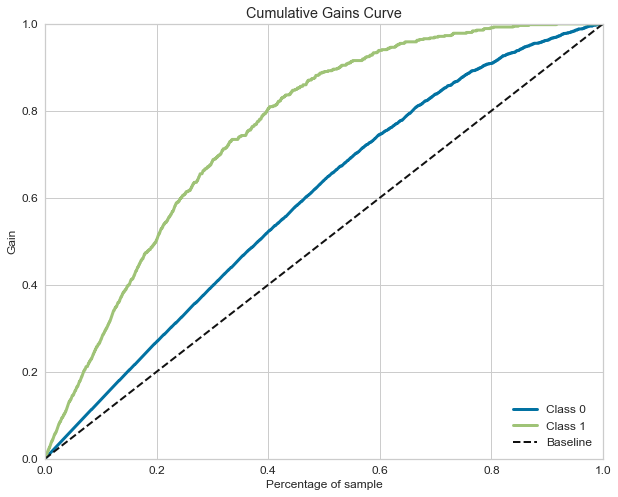

In [177]:
skplt.metrics.plot_cumulative_gain(y_test,logreg_model.predict_proba(X_test_c), title='Cumulative Gains Curve',figsize=(10,8))

pada 20% populasi,dengan mengurutkan probability, model mampu memprediksi 50% customer yang akan churn

### 17.4 Lift Curve

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

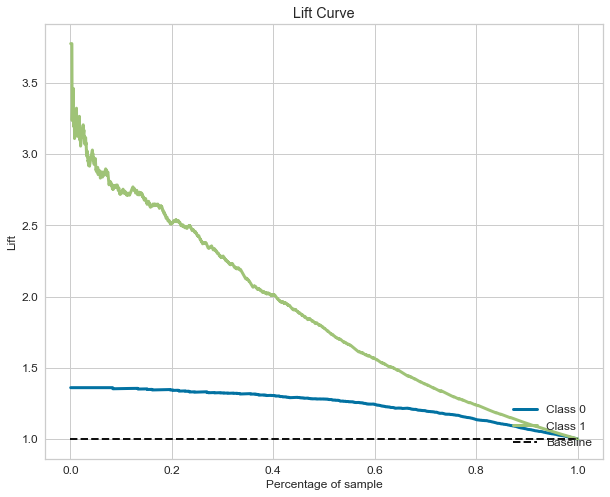

In [178]:
skplt.metrics.plot_lift_curve(y_test,logreg_model.predict_proba(X_test_c), title='Lift Curve',figsize=(10,8))

Pada 20% populasi, peforma model 2,5x lebih baik daripada random choice

## 18. Feature Importance

In [ ]:
import dalex as dx

In [ ]:
naive_explainer = dx.Explainer(naive, X_train_re, y_train_re, label = "Naive Bayes Interpretation")

In [ ]:
naive_explainer.model_profile().plot()

In [ ]:
# visualize permutation feature importance for ridge regression
naive_explainer.model_parts().plot()

# Recommendation

1. Melakukan perbaikan pada layanan Fiber Optic
2. Menawarkan bundling package Fiber Optic  dengan Online Security dan atau Tech Support jika mengambil sistem contract minimal 1 tahun
